<a id='top'></a>

## Shedding some light on used car prices

My wife and I were in the market to replace a car. It's one of the bigger financial decisions people make on a regular basis so I wanted to make a smart choice. There are reviews online and you can get a sense of prices by shopping around. But I wanted to know more. This post will walk you through some exploratory analysis I did to answer these questions:

1. [**How do used car prices trend with mileage and model year?**](#price)
2. [**How do these trends differ between similar car models?**](#models)
3. [**What mileage of car gives the best value?**](#value)
4. [**How does a hybrid compare in long term value compared to a standard sedan?**](#hybrids)

And I can answer most of these questions with Kelley Blue Book. They have a wide range of market price estimates for any car model/year/mileage/condition. And as it turns out, their web pages have that information pretty easily accessible in the HTML. So we can rig up a simple web scraper and get the info we need! 

Below I'll explain of [**how I got this data**](#scraping) and [**how I analyzed it**](#analysis). If you're not interested in the technical details, you can jump right to the [**summary**](#summary). Lastly, I'm experimenting with embedded code blocks so I'll include example code for each step along the way (please forgive the mediocre code. It was a quick and dirty hobby project).

<a id='scraping'></a>

## Step 1: Getting Data from KBB

[**top of page**](#top)

First of all, what data do we want? The cars I'm interested in are the following:

- Honda Civic
- Hyundai Elantra
- Toyota Carolla
- Ford Fusion
- Honda Insight
- Toyota Prius

The list consists of a few standard compact sedans and a few basic hybrid models. I wanted to buy a ~5 year old used car, so I targeted 2010, 2011 and 2012 models. I found www.kbb.com results for each of these combinations of model/year and used the following code to extract pricing information for each.

In [73]:
# define what mileage values I want to pull a price for
# in this case, ever 10k miles between 10k and 130k
mileages = range(10000, 230000+10000, 10000)

# these parameters don't matter. they specify 
# what condition of vehicle to pull up on kbb, but 
# each kbb page contains numbers for all conditions
condition = 'verygood'
pricetype = 'retail'
intent = 'buy-used'

# price estimates vary by zip code so you have to specify
zipcode = '11961'

#initialize a root dictionary containing car info.
#the root index will specify car model
#the next level index will specify model year
#each model year then contains a set of variables with values (leaves)
scraped_data = {}

# I had to manually look up the URL for each car model/year on kbb as they are non standard
# if you want to add a different car, you have to go look on kbb and define a dictionary 
# entry similar to those below

# http://www.kbb.com/hyundai/elantra/2010/gls-sedan-4d/?vehicleid=261559&category=sedan
# http://www.kbb.com/hyundai/elantra/2011/gls-sedan-4d/?vehicleid=352613&category=sedan
# http://www.kbb.com/hyundai/elantra/2012/gls-sedan-4d/?vehicleid=364017&category=sedan
car = 'elantra'
scraped_data[car] = {}
scraped_data[car][2010] = {}
scraped_data[car][2010]['path'] = 'hyundai/elantra/2010/gls-sedan-4d'
scraped_data[car][2010]['vehicleid'] = 261559
scraped_data[car][2011] = {}
scraped_data[car][2011]['path'] = 'hyundai/elantra/2011/gls-sedan-4d'
scraped_data[car][2011]['vehicleid'] = 352613
scraped_data[car][2012] = {}
scraped_data[car][2012]['path'] = 'hyundai/elantra/2012/gls-sedan-4d'
scraped_data[car][2012]['vehicleid'] = 364017
for year in scraped_data[car]:
    scraped_data[car][year]['category'] = 'sedan'
    scraped_data[car][year]['mileage'] = []
    scraped_data[car][year]['prices'] = []
    scraped_data[car][year]['condition'] = condition
    scraped_data[car][year]['type'] = 'economic car'

# http://www.kbb.com/toyota/prius/2010/i-hatchback-4d/?vehicleid=261967&category=hatchback
# http://www.kbb.com/toyota/prius/2011/two-hatchback-4d/?vehicleid=363079&category=hatchback
# http://www.kbb.com/toyota/prius/2012/two-hatchback-4d/?vehicleid=373443&category=hatchback
car = 'prius'
scraped_data[car] = {}
scraped_data[car][2010] = {}
scraped_data[car][2010]['path'] = 'toyota/prius/2010/i-hatchback-4d'
scraped_data[car][2010]['vehicleid'] = 261967
scraped_data[car][2011] = {}
scraped_data[car][2011]['path'] = 'toyota/prius/2011/two-hatchback-4d'
scraped_data[car][2011]['vehicleid'] = 363079
scraped_data[car][2012] = {}
scraped_data[car][2012]['path'] = 'toyota/prius/2012/two-hatchback-4d'
scraped_data[car][2012]['vehicleid'] = 373443
for year in scraped_data[car]:
    scraped_data[car][year]['category'] = 'hatchback'
    scraped_data[car][year]['mileage'] = []
    scraped_data[car][year]['prices'] = []
    scraped_data[car][year]['condition'] = condition
    scraped_data[car][year]['type'] = 'hybrid car'

# http://www.kbb.com/honda/insight/2010/lx-hatchback-4d/?vehicleid=251583&swop=false&category=hatchback
# http://www.kbb.com/honda/insight/2011/lx-hatchback-4d/?vehicleid=360124&swop=false&category=hatchback
# http://www.kbb.com/honda/insight/2012/lx-hatchback-4d/?vehicleid=371307&swop=false&category=hatchback
car = 'insight'
scraped_data[car] = {}
scraped_data[car][2010] = {}
scraped_data[car][2010]['path'] = 'honda/insight/2010/lx-hatchback-4d'
scraped_data[car][2010]['vehicleid'] = 251583
scraped_data[car][2011] = {}
scraped_data[car][2011]['path'] = 'honda/insight/2011/lx-hatchback-4d'
scraped_data[car][2011]['vehicleid'] = 360124
scraped_data[car][2012] = {}
scraped_data[car][2012]['path'] = 'honda/insight/2012/lx-hatchback-4d'
scraped_data[car][2012]['vehicleid'] = 371307
for year in scraped_data[car]:
    scraped_data[car][year]['category'] = 'hatchback'
    scraped_data[car][year]['swop'] = 'false'
    scraped_data[car][year]['mileage'] = []
    scraped_data[car][year]['prices'] = []
    scraped_data[car][year]['condition'] = condition
    scraped_data[car][year]['type'] = 'hybrid car'

# http://www.kbb.com/toyota/corolla/2010/sedan-4d/?vehicleid=261636&category=sedan
# http://www.kbb.com/toyota/corolla/2011/sedan-4d/?vehicleid=360136&category=sedan
# http://www.kbb.com/toyota/corolla/2012/le-sedan-4d/?vehicleid=371591&category=sedan
car = 'corolla'
scraped_data[car] = {}
scraped_data[car][2010] = {}
scraped_data[car][2010]['path'] = 'toyota/corolla/2010/sedan-4d'
scraped_data[car][2010]['vehicleid'] = 261636
scraped_data[car][2011] = {}
scraped_data[car][2011]['path'] = 'toyota/corolla/2011/sedan-4d'
scraped_data[car][2011]['vehicleid'] = 360136
scraped_data[car][2012] = {}
scraped_data[car][2012]['path'] = 'toyota/corolla/2012/le-sedan-4d'
scraped_data[car][2012]['vehicleid'] = 371591
for year in scraped_data[car]:
    scraped_data[car][year]['category'] = 'sedan'
    scraped_data[car][year]['mileage'] = []
    scraped_data[car][year]['prices'] = []
    scraped_data[car][year]['condition'] = condition
    scraped_data[car][year]['type'] = 'economic car'

# http://www.kbb.com/honda/civic/2010/dx-sedan-4d/?vehicleid=261537&category=sedan
# http://www.kbb.com/honda/civic/2011/dx-sedan-4d/?vehicleid=358177&category=sedan
# http://www.kbb.com/honda/civic/2012/dx-sedan-4d/?vehicleid=371048&category=sedan
car = 'civic'
scraped_data[car] = {}
scraped_data[car][2010] = {}
scraped_data[car][2010]['path'] = 'honda/civic/2010/dx-sedan-4d'
scraped_data[car][2010]['vehicleid'] = 261537
scraped_data[car][2011] = {}
scraped_data[car][2011]['path'] = 'honda/civic/2011/dx-sedan-4d'
scraped_data[car][2011]['vehicleid'] = 358177
scraped_data[car][2012] = {}
scraped_data[car][2012]['path'] = 'honda/civic/2012/dx-sedan-4d'
scraped_data[car][2012]['vehicleid'] = 371048
for year in scraped_data[car]:
    scraped_data[car][year]['category'] = 'sedan'
    scraped_data[car][year]['mileage'] = []
    scraped_data[car][year]['prices'] = []
    scraped_data[car][year]['condition'] = condition
    scraped_data[car][year]['type'] = 'economic car'

# ford/fusion/2010/hybrid-sedan-4d/?vehicleid=248464
# ford/fusion/2011/hybrid-sedan-4d/?vehicleid=352866
# ford/fusion/2012/hybrid-sedan-4d/?vehicleid=364410
car = 'fusion-hybrid'
scraped_data[car] = {}
scraped_data[car][2010] = {}
scraped_data[car][2010]['path'] = 'ford/fusion/2010/hybrid-sedan-4d'
scraped_data[car][2010]['vehicleid'] = 248464
scraped_data[car][2011] = {}
scraped_data[car][2011]['path'] = 'ford/fusion/2011/hybrid-sedan-4d'
scraped_data[car][2011]['vehicleid'] = 352866
scraped_data[car][2012] = {}
scraped_data[car][2012]['path'] = 'ford/fusion/2012/hybrid-sedan-4d'
scraped_data[car][2012]['vehicleid'] = 364410
for year in scraped_data[car]:
    scraped_data[car][year]['mileage'] = []
    scraped_data[car][year]['prices'] = []
    scraped_data[car][year]['condition'] = condition
    scraped_data[car][year]['type'] = 'hybrid car'
    
#toyota/prius-c/2012/three-hatchback-4d-specifications/?vehicleid=374558&intent
car = 'prius-c'
scraped_data[car] = {}
scraped_data[car][2012] = {}
scraped_data[car][2012]['path'] = 'toyota/prius-c/2012/three-hatchback-4d'
scraped_data[car][2012]['vehicleid'] = 374558
for year in scraped_data[car]:
    scraped_data[car][year]['category'] = 'hatchback'
    scraped_data[car][year]['mileage'] = []
    scraped_data[car][year]['prices'] = []
    scraped_data[car][year]['condition'] = condition
    scraped_data[car][year]['type'] = 'hybrid car'

In [ ]:
from bs4 import BeautifulSoup
import requests
import json
import shelve

# loop through the dictionary indicies (model/year) and pull info from kbb
for car in scraped_data:
    for year in scraped_data[car]:
        for mileage in mileages:
            print '<%d-%s>: Reading url for car with %s miles:' % (year, car, mileage)
            
            
            # To find the proper kbb URL for each car permutation, I looked at the 
            # URL's manually to figure out the formatting and define a string accordingly
            url = 'http://www.kbb.com/%s/' % scraped_data[car][year]['path']
            url += '?vehicleid=%s&' % scraped_data[car][year]['vehicleid']
            if 'category' in scraped_data[car][year]:
                url += 'category=%s&' % scraped_data[car][year]['category']
            url += 'mileage=%s&' % mileage
            url += 'condition=%s&' % condition
            url += 'intent=%s&' % intent
            url += 'pricetype=%s' % pricetype

            print '<%d-%s>: ' % (year, car), url
            
            # the header isn't strictly necessary but makes it look like you're actually 
            # pulling the web page from a browser, not from a script
            headers = {'User-Agent': \
                 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 '+\
                 '(KHTML, like Gecko) Chrome/52.0.2743.116 Safari/537.36'}            
            
            # Get the page HTML. here we use 'requests', but 'urllib' and 
            # 'mechanize' are other package options the cookie parameter is 
            # included match the cookie I noticed specifying zip code on kbb.com
            html = requests.get(url, 
                                cookies={'ZipCode': zipcode}, 
                                headers=headers).text
            
            # load the html in to beautiful soup
            soup = BeautifulSoup(html)
            
            print '<%d-%s>: webpage loading complete. parsing...' % (year, car)

            # I'm expecting there to be only one html <script> element that has these
            # attributes. I manually looked in the webpage source and searched for the number
            # matching what was displayed on the webpage to identify the element
            # with the pricing info of interest
            element = soup.find('script', 
                                attrs={'type': 'text/javascript', 
                                       'language': 'javascript'})

            #make sure the string isn't empty
            if element.string:
                # make sure it contains the content we expect
                if element.string.lstrip()[:18] == '$(document).ready(':
                    # strip white space
                    full_str = element.string.lstrip()

                    # I found that this HTML container contained text
                    # that specified prices for different seller conditions
                    # in a json format. So by counting the right number of lines
                    # I can get the pricing data directly. Sometimes there were 
                    # was extra lines included, hence the 37/32 try-except. 
                    try:
                        line_count = 0
                        count_limit = 37
                        save_lines=False

                        # the princing info will be added in this string
                        json_data = ''

                        for line in full_str.splitlines():
                            # the word values indicated where pricing info starts
                            if line.lstrip()[1:7] == 'values':
                                save_lines = True

                            if save_lines:
                                json_data += line.lstrip()

                                line_count += 1
                                if line_count >= count_limit:
                                    save_lines = False

                        # tack on braces for final json formatting
                        json_data = '{' + json_data[:-1] + '}'
                        
                        # this doesn't actually do anything now but will throw 
                        # the error we want to catch if it's supposed to be 32 lines
                        json.loads(json_data)
                    except:
                        line_count = 0
                        count_limit = 32
                        save_lines=False

                        # the princing info will be added in this string
                        json_data = ''

                        for line in full_str.splitlines():
                            # the word values indicated where pricing info starts
                            if line.lstrip()[1:7] == 'values':
                                save_lines = True

                            if save_lines:
                                json_data += line.lstrip()

                                line_count += 1
                                if line_count >= count_limit:
                                    save_lines = False

                        # tack on braces for final json formatting
                        json_data = '{' + json_data[:-1] + '}'

                    # de-serialize the json string in to a dictionary (with 2 indices) 
                    # specifying prices under different conditions
                    scraped_data[car][year]['prices'].append(json.loads(json_data)['values'])
                    
                    scraped_data[car][year]['mileage'].append(int(mileage))
                    
                    print '<%d-%s>: found price info!' % (year, car)
                else:
                    print '<%d-%s>: PROBLEM - FAILED TO FIND PRICE INFO!' % (year, car)
            else:
                print '<%d-%s>: PROBLEM - FAILED TO FIND PRICE INFO!' % (year, car)
            
            print '<%d-%s>: finished loading data!' % (year, car)
            print ''

print 'FINISHED LOADING ALL CARS!'

# now that we have the data, we want to construct a more flat structure
# (i.e. - a single table with non-hierarchical columns) and put it in a dataframe
#
# define a dictionary that will be used to construct the dataframe (indices are columns):
car_prices = {}
car_prices['car'] = []
car_prices['year'] = []
car_prices['mileage'] = []
car_prices['retail'] = []
car_prices['dealer'] = []
car_prices['dealer_min'] = []
car_prices['dealer_max'] = []
car_prices['pp_fair'] = []
car_prices['pp_good'] = []
car_prices['pp_verygood'] = []
car_prices['pp_excellent'] = []

for car in scraped_data:
    for year in scraped_data[car]:
        for mileage, price in zip(scraped_data[car][year]['mileage'], 
                                  scraped_data[car][year]['prices']):
            car_prices['car'].append(car)
            car_prices['year'].append(year)
            car_prices['mileage'].append(mileage)
            # I manually looked at the 'price' dicitonary structure for this:
            car_prices['retail'].append(price['retail']['price'])
            car_prices['dealer'].append(price['fpp']['price'])
            car_prices['dealer_min'].append(price['fpp']['priceMin'])
            car_prices['dealer_max'].append(price['fpp']['priceMax'])
            car_prices['pp_fair'].append(price['privatepartyfair']['price'])
            car_prices['pp_good'].append(price['privatepartygood']['price'])
            car_prices['pp_verygood'].append(price['privatepartyverygood']['price'])
            car_prices['pp_excellent'].append(price['privatepartyexcellent']['price'])


df = pd.DataFrame(car_prices)
            
# save the scraped data to file so you don't have to scrape it again later
f = shelve.open('scraped_data.shelf', flag='n')
f['df'] = df
f.close()

Now we have prices for all our models and years, for mileages ranging between 10k - 130k miles. And in fact we have a variety of prices for each: retail, used from a dealer, and used from a private party in various conditions (fair/good/very good/excellent). Now to see what we can learn!

<a id='analysis'></a>

## Step 2: Answering Questions

[**top of page**](#top)


Let's hit the questions one by one. First load the scraped data from file:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import shelve
%matplotlib inline

# load the scraped data from file
f = shelve.open('scraped_data.shelf', flag='r')
df = f['df']
f.close()


# split the dataframe by car model for convenience
data = {}
for car in df['car'].unique():
    data[car] = {}
    data[car][2010] = df[(df['car'] == car) & (df['year'] == 2010)]
    data[car][2011] = df[(df['car'] == car) & (df['year'] == 2011)]
    data[car][2012] = df[(df['car'] == car) & (df['year'] == 2012)]

<a id='price'></a>

### 1. How do used car prices trend with mileage and model year?

[**top of page**](#top)

Below is an example plot of price vs. mileage. The example chosen was the Toyota Corolla for model years 2010, 2011 and 2012 and the price shown is a median used price you'd expect to pay at a dealer. As you can see, the general trends are what you expect: price goes down if you're buying a higher mileage car, and price goes down if you're buying an older model year. 

For a given model year, the trend vs mileage is not exactly linear, but close. As expected, the rate of price decay slows at higher mileage but surprisingly, the rate of price decay is also lower at the lowest mileages. So if you're looking at cars in the range of 20k miles, you'll get a better value if you chose one closer to 10k than if you choose one closer to 30k (but we'll dig deeper in to that choice later). This behavior vs mileage is similar between years and it will turn out it's also similar in shape (but different in slope) between car models.

As for the different model years, the price gets more expensive with respect to year at a greater than linear rate. Also the rate of price decay vs mileage is only slightly different between years. Both of these trends differ between different car models, which will be discussed next.

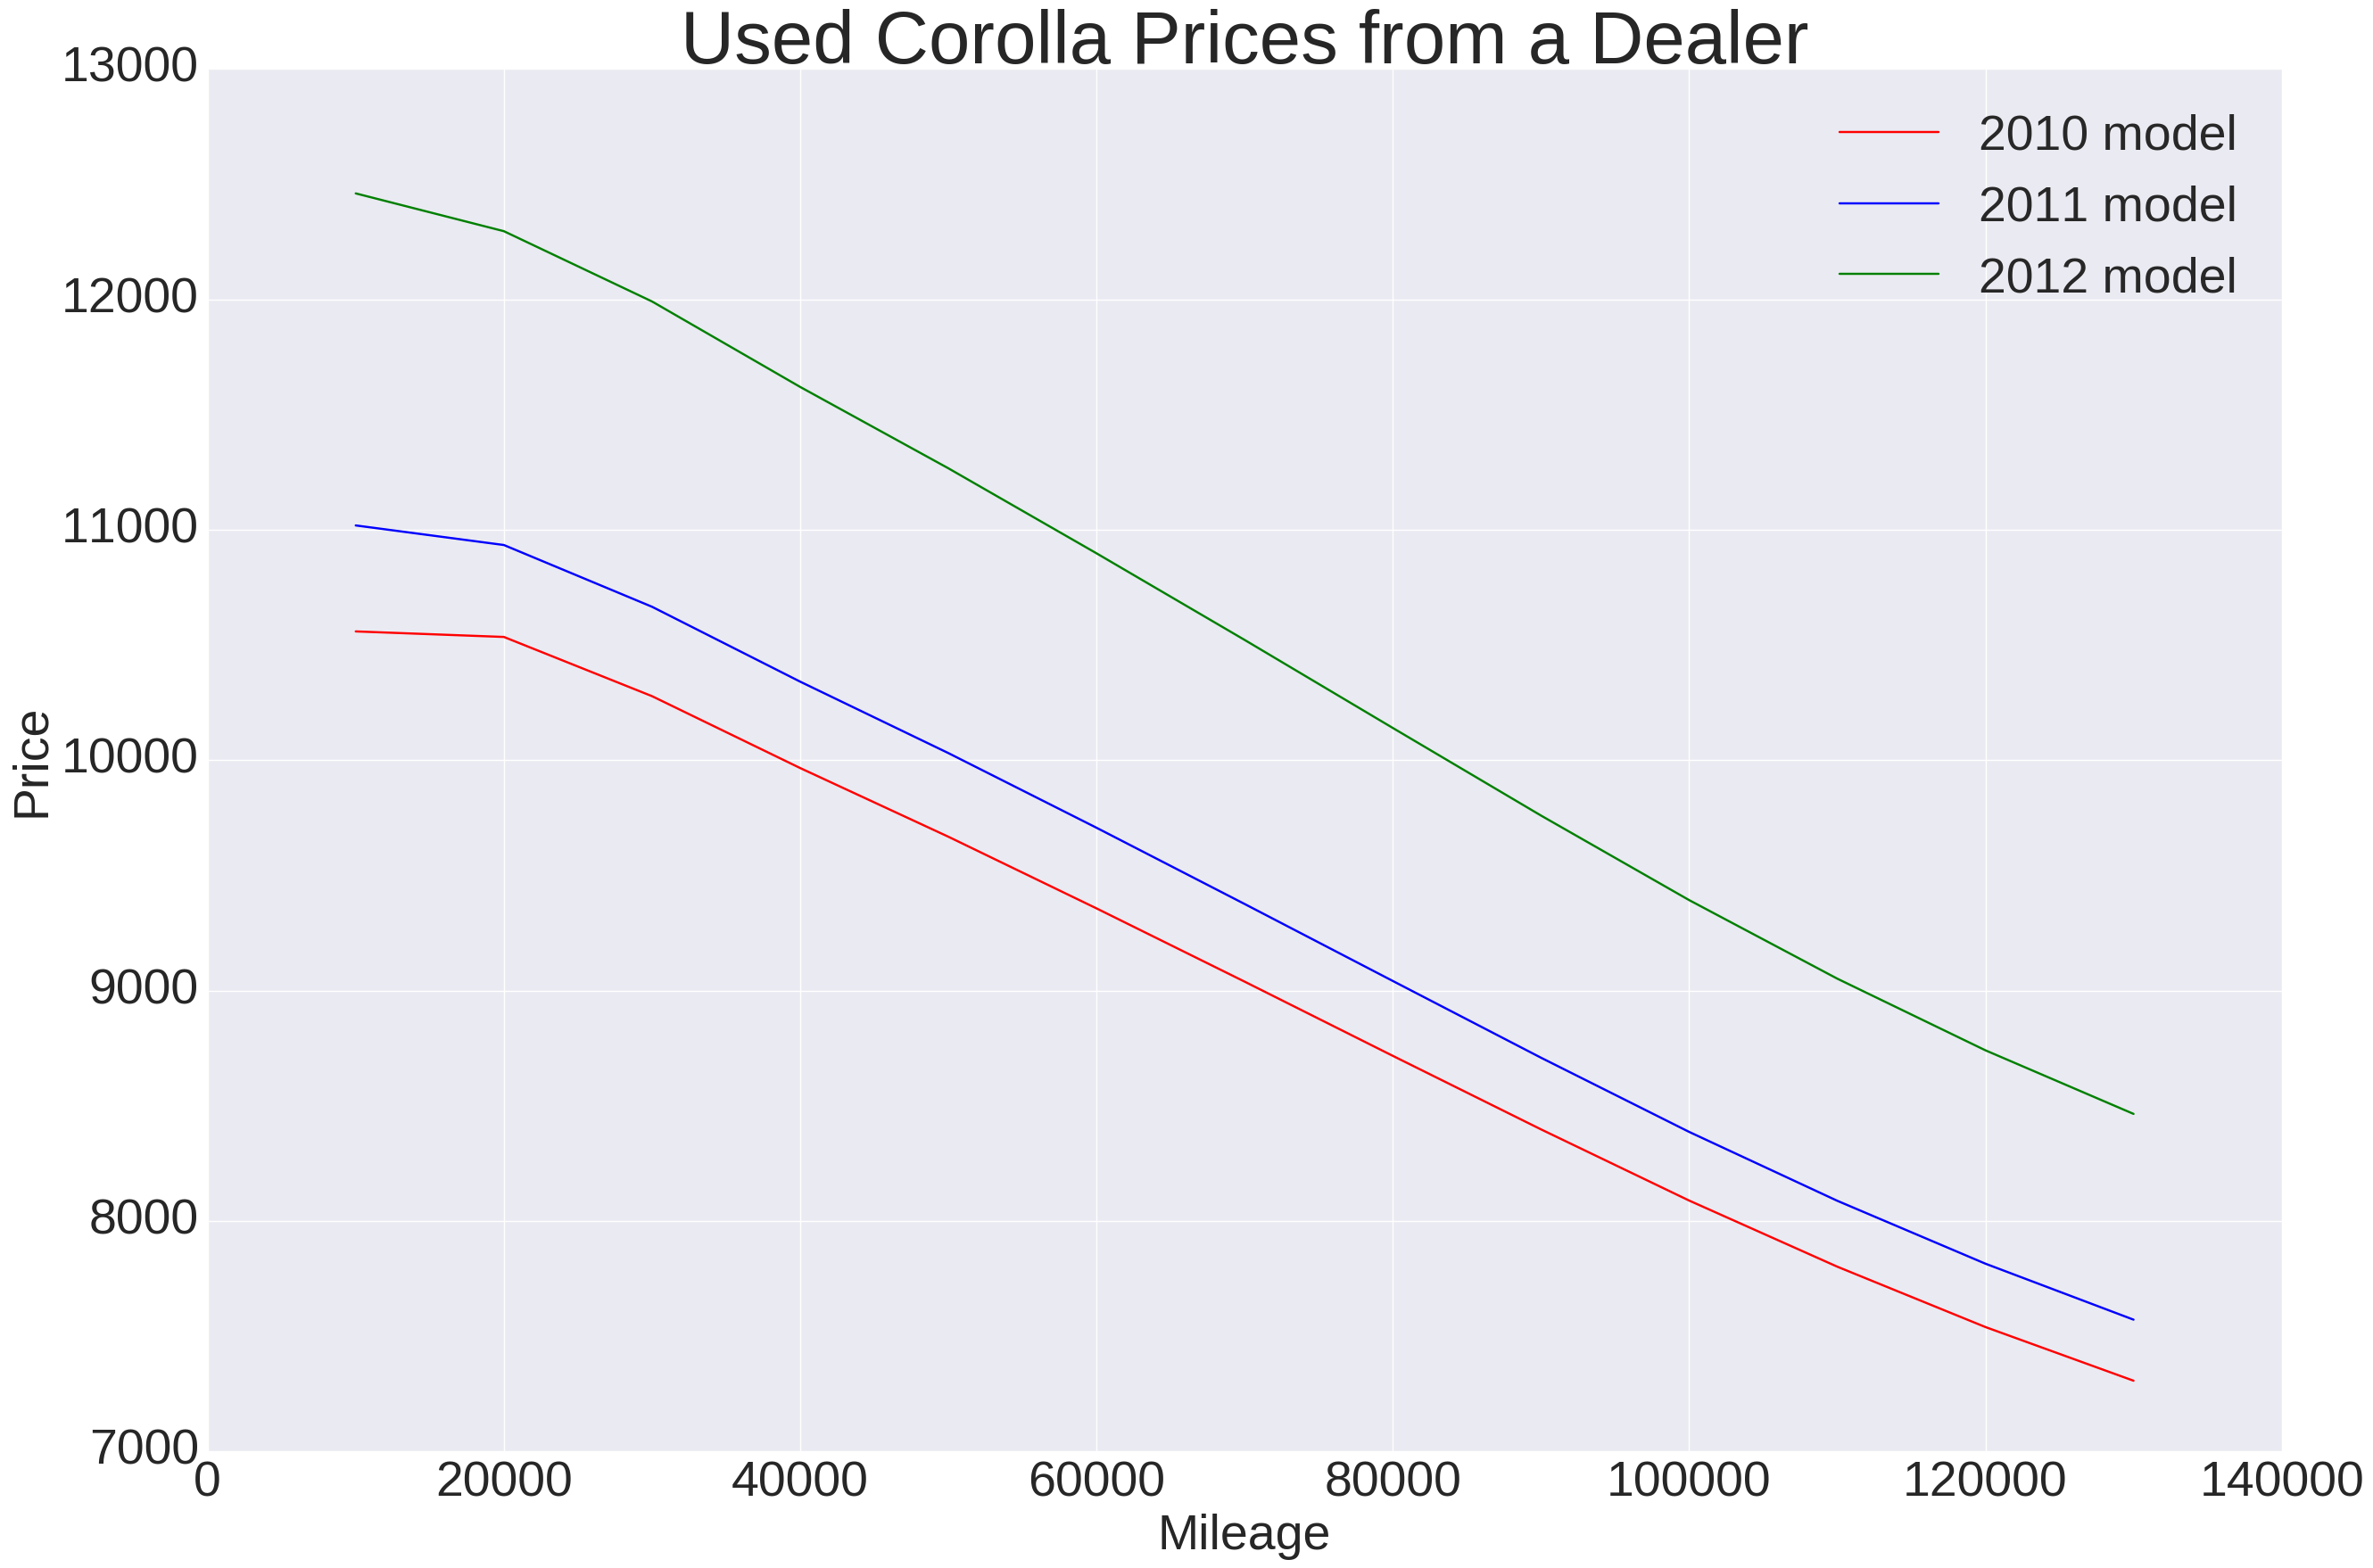

In [124]:
def mileage_cut(data, mileage):
    subset = {}
    for car in data:
        subset[car] = {}
        for year in data[car]:
            subset[car][year] = data[car][year][data[car][year]['mileage'] <= mileage]
            
    return subset

subset = mileage_cut(data, 130000)

car = 'corolla'
fig, ax = plt.subplots()
height = 20
fig.set_figheight(height)
width = 30
fig.set_figwidth(width)
ax.set_title('Used %s Prices from a Dealer' % car.title(), fontsize=width*2)
ax.set_xlabel('Mileage', fontsize=height*2)
ax.set_ylabel('Price', fontsize=height*2)
ax.tick_params(axis='y', labelsize=height*2)
ax.tick_params(axis='x', labelsize=height*2)
ax.ticklabel_format()

dealer = {}
colors = {2010:'r', 2011:'b', 2012:'g'}

for year in [2010, 2011, 2012]:
    dealer[year] = ax.plot(subset[car][year].mileage, 
                           subset[car][year].dealer, 
                           c=colors[year])

ax.legend([(dealer[2010][0]), 
            (dealer[2011][0]), 
            (dealer[2012][0])
          ], 
           ['2010 model', 
            '2011 model', 
            '2012 model'
           ],
          fontsize=height*2)

ax.set_yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1]+1000, 1000))
#plt.xticks(np.arange(ax.get_xticks()[0], ax.get_xticks()[-1]+10000, 10000), 
#           range(int(ax.get_xticks()[0]), int(ax.get_xticks()[-1])+10000, 10000),
#          rotation='vertical')

plt.show()

<a id='models'></a>

### 2. How do these trends differ between similar car models?

[**top of page**](#top)

A good way to compare mileage trends between car models is to look at each model on a "low mileage price" vs "high mileage price" plot. This is shown below for our 6 car models of interest - standard sedans are triangles and hybrids are circles. Each region of the plot can be interpreted as labeled: a car being "cheaper" vs "more expensive" is determined by it's position diagonally bottom-left to top-right. and a car's rate of price decay is shown by it's position diagonally top-left to bottom-right.

This gives us a sense of how the car models compare. The Prius is the most expensive while the Civic is the cheapest. And the Corolla tends to be have the slowest price decay, while the Elantra or Fusion-hybrid lose their value faster. All useful information to consider when choosing what to buy!

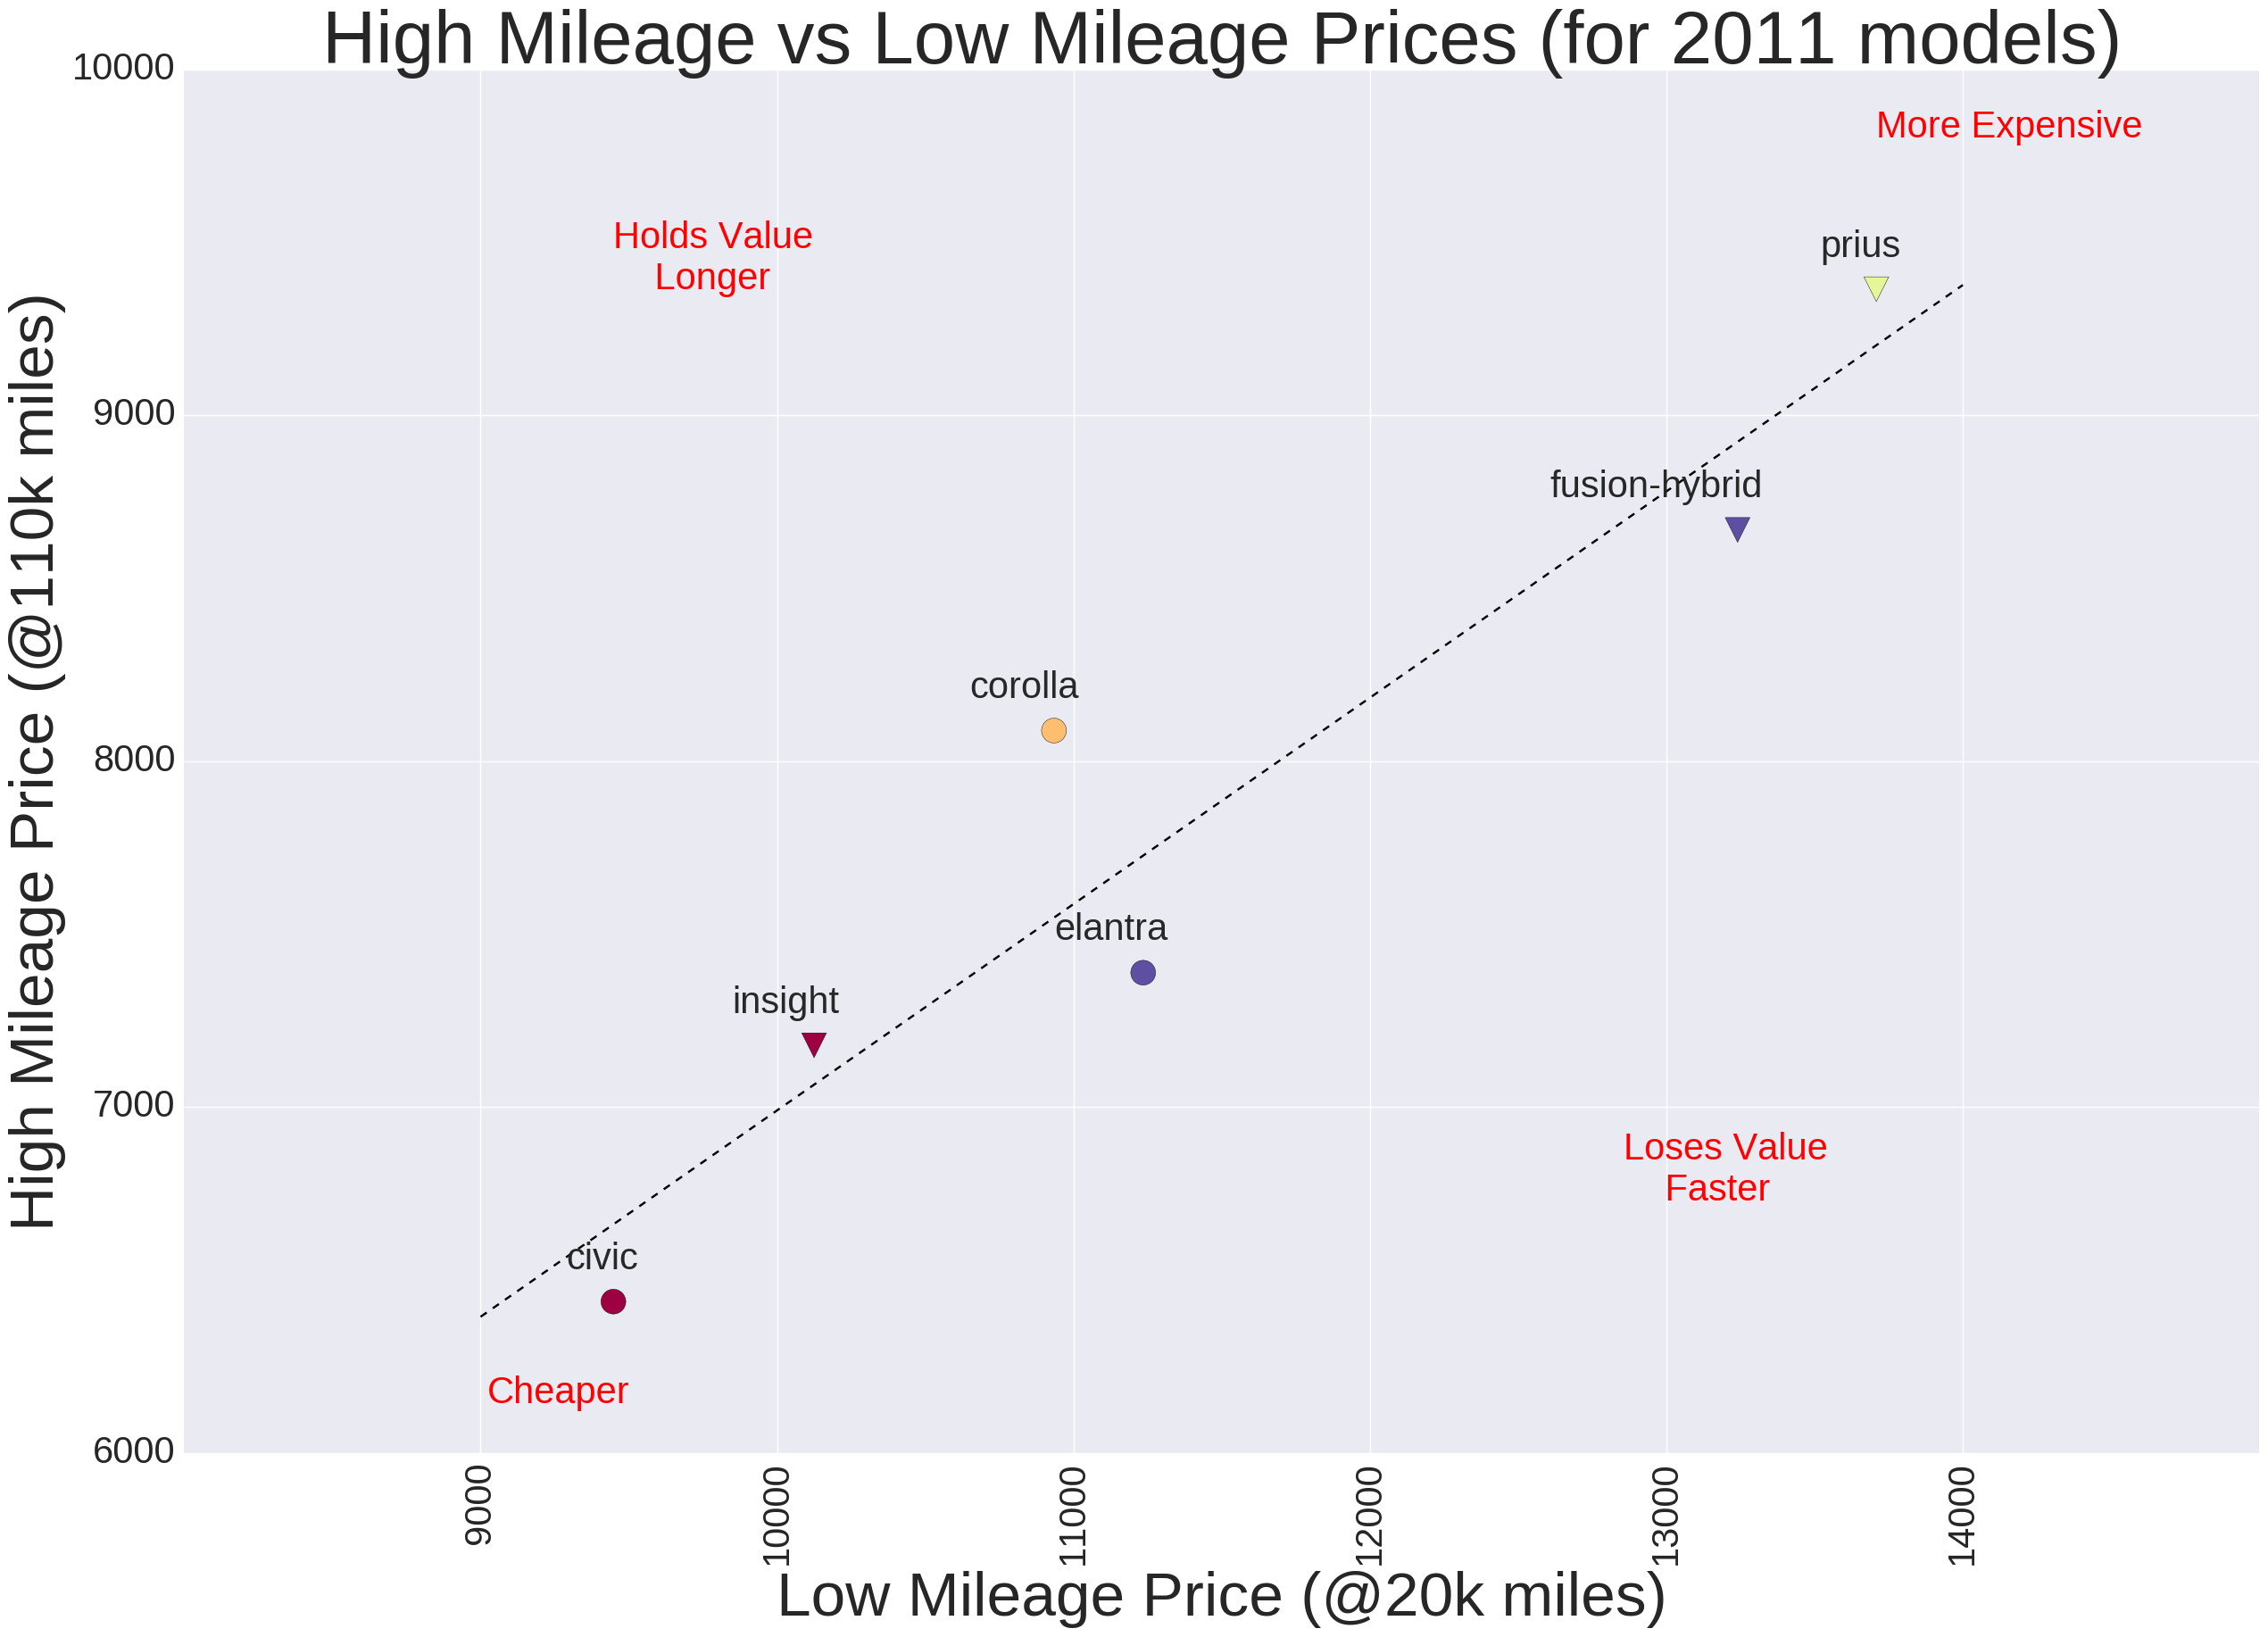

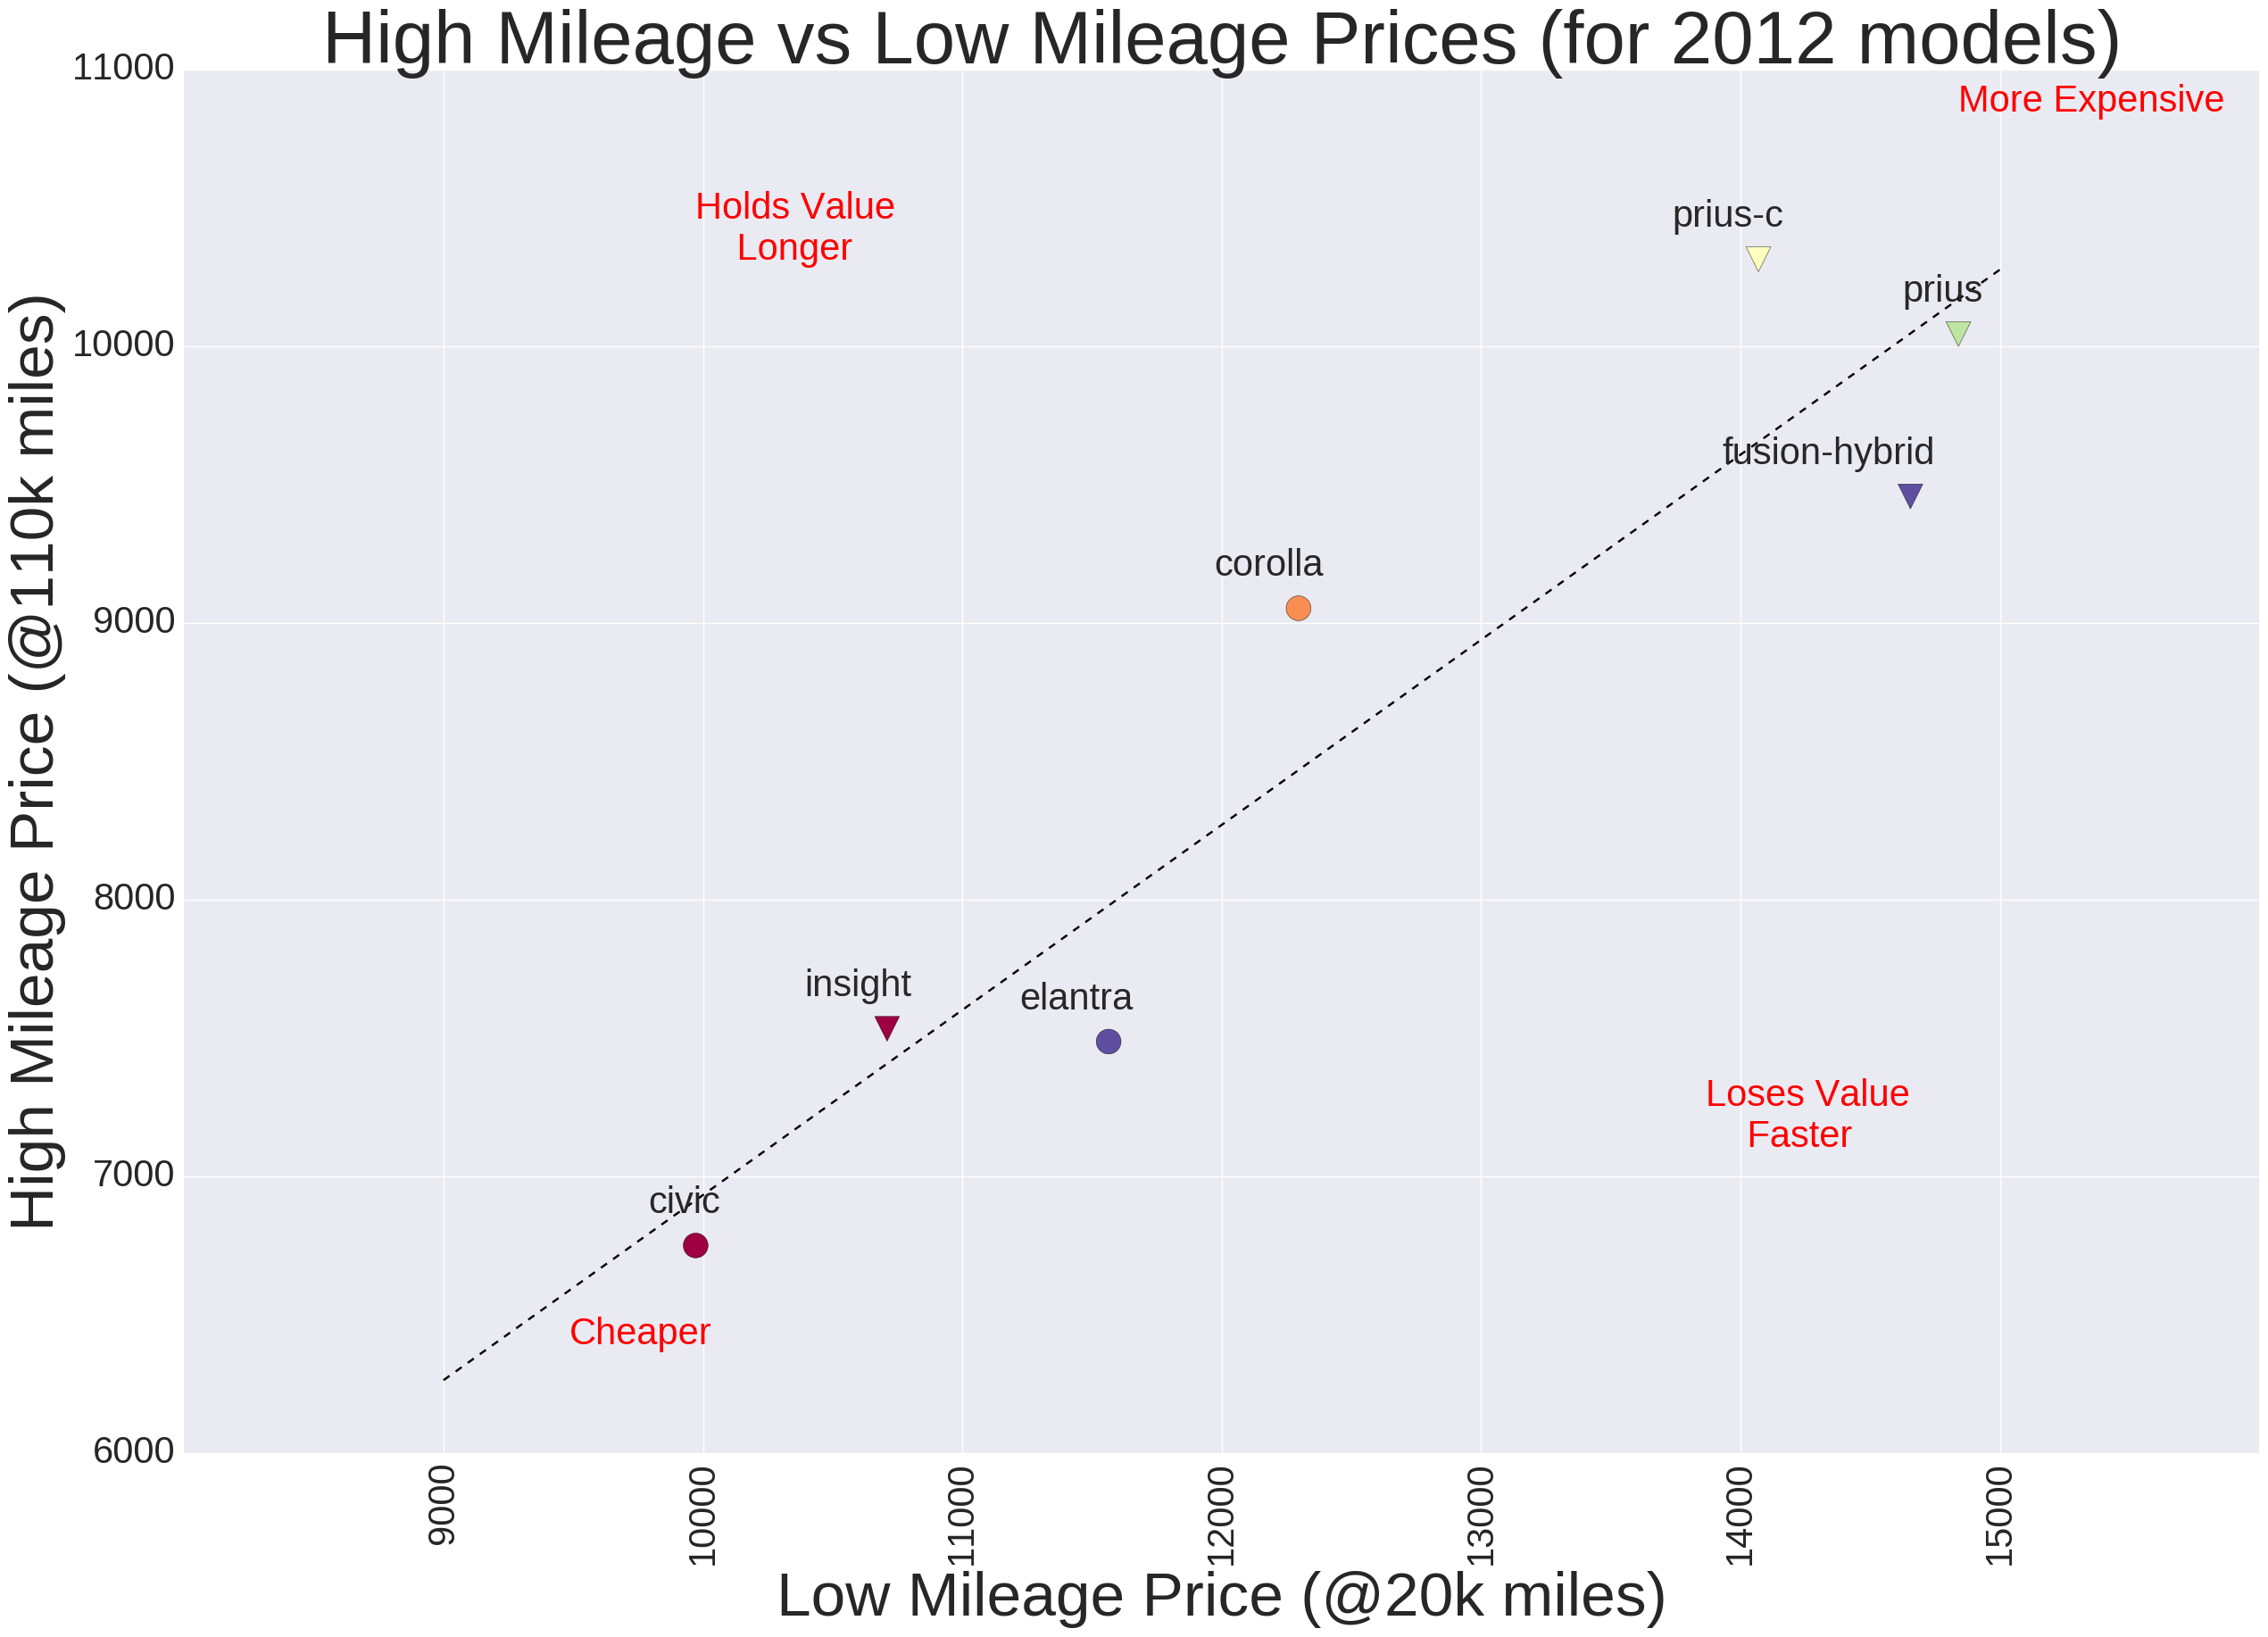

In [126]:
# make separate plots for each car model of the price trend vs mileage for all pricing options
for year in [2011, 2012]:
    fig, ax = plt.subplots()
    height = 20
    fig.set_figheight(height)
    width = 30
    fig.set_figwidth(width)
    ax.set_title('High Mileage vs Low Mileage Prices (for %d models)' % year, fontsize=width*2)
    ax.set_xlabel('Low Mileage Price (@20k miles)', fontsize=height*2.5)
    ax.set_ylabel('High Mileage Price (@110k miles)', fontsize=height*2.5)
    ax.tick_params(axis='y', labelsize=height*1.5)
    ax.tick_params(axis='x', labelsize=height*1.5)

    cars = df[df['year'] == year]['car'].unique()
    low_m_prices = df[(df['year'] == year) & (df['mileage'] == 20000)]['dealer'].values
    high_m_prices = df[(df['year'] == year) & (df['mileage'] == 110000)]['dealer'].values
    
    hybrid = [[], [], []]
    sedan = [[], [], []]
    
    for i, car, low, high in zip(range(len(cars)), cars, low_m_prices, high_m_prices):
        if car in ['insight', 'prius-c', 'fusion-hybrid', 'prius']:
            hybrid[0].append(low)
            hybrid[1].append(high)
            hybrid[2].append(i*1.0/len(cars))
        else:
            sedan[0].append(low)
            sedan[1].append(high)
            sedan[2].append(i*1.0/len(cars))
            
        plt.annotate(
                car, 
                xy = (low, high), xytext = (20, 20), fontsize=height*1.5, 
                textcoords = 'offset points', ha = 'right', va = 'bottom')
    
    plt.scatter(
        hybrid[0], 
        hybrid[1], 
        marker='v', 
        c=hybrid[2],
        s=height*20,
        cmap=plt.get_cmap('Spectral'))
    plt.scatter(
        sedan[0], 
        sedan[1], 
        marker='o', 
        c=sedan[2],
        s=height*20,
        cmap=plt.get_cmap('Spectral'))
    
    x_points = np.arange(1000*np.floor(low_m_prices.min()/1000), 
                            1000*np.ceil(low_m_prices.max()/1000)+1000, 1000)
    y_points = np.arange(1000*np.floor(high_m_prices.min()/1000), 
                            1000*np.ceil(high_m_prices.max()/1000)+1000, 1000)
    
    m, b = np.polyfit(low_m_prices,
                      high_m_prices, 1)
    plt.plot(x_points,
             x_points*m+b,
             c='k',
             linestyle='dashed')
        

    ax.set_yticks(y_points)
    plt.xticks(x_points, 
               range(int(1000*np.floor(low_m_prices.min()/1000)), 
                     int(1000*np.ceil(low_m_prices.max()/1000)+1000), 1000),
              rotation='vertical')
    
    x_min = low_m_prices.min()
    x_max = low_m_prices.max()
    dlt_x = x_max - x_min
    y_min = high_m_prices.min()
    y_max = high_m_prices.max()
    dlt_y = y_max - y_min
    
    plt.annotate('Loses Value\n    Faster', 
                 xy=(x_min+0.8*dlt_x, y_max-0.9*dlt_y),
                 color='r',
                 fontsize=height*1.5)
    plt.annotate('Holds Value\n    Longer', 
                 xy=(x_min, y_max),
                 color='r',
                 fontsize=height*1.5)
    plt.annotate('More Expensive', 
                 xy=(x_max+0*dlt_x, y_max+.15*dlt_y),
                 color='r',
                 fontsize=height*1.5)
    plt.annotate('Cheaper', 
                 xy=(x_min-.1*dlt_x, y_min-.1*dlt_y),
                 color='r',
                 fontsize=height*1.5)
    if year == 2011:
        plt.savefig('models_comparison', bbox_inches='tight')

    plt.show()


<a id='value'></a>

### 3. What mileage of car gives the best value?

[**top of page**](#top)

There's a lot of factors to account for if you want to compare value in detail between different cars - initial purchase price, resale value, maintenance costs, gas mileage, reliability compared to other cars - the list goes on. Unfortunately, in my first pass I didn't have all of this information (but stay tuned for a follow up post!). 

We can still gain some insight, however, by simplifying things in two ways: 
- **Only consider one car at a time**. This way we can ignore factors that are only relative differences between car make/models.
- **Assume you will buy the car and keep it until it dies** (as opposed to re-selling the car later). This only requires estimating a mileage at which you expect the car to die. That's much easier than looking at resale values at a later date with degrading condition of the car over time.

The question I CAN answer this way is "*how does lifetime value of the car change with initial purchase mileage?*". Should you spend more for a low mileage car, or save some money and buy a car with higher mileage? Which gives you the best bang for the buck in the long run? 

With the above constraints, there are two big factors that make a difference in the lifetime value of the car: **purchase price** and **maintenance cost**. We'll look at each below.

#### Purchase price

We're interested in lifetime value of the car. This means averaging costs over ownership - how much do you end up paying for each mile you drive? Purchase price is pretty easy then. Just pick a mileage you think the car might die, subtract the mileage at purchase, then divide that in to the purchase price. Boom. You get price paid per mile in the lifetime of the car (shown in the following plots as "price per 10,000 miles" to be more intuitive).

The first set of plots will show how this value changes based on the purchase mileage for 3 different options for a "death" mileage. It shows this for both a Toyota Corolla and a Honda Civic. 

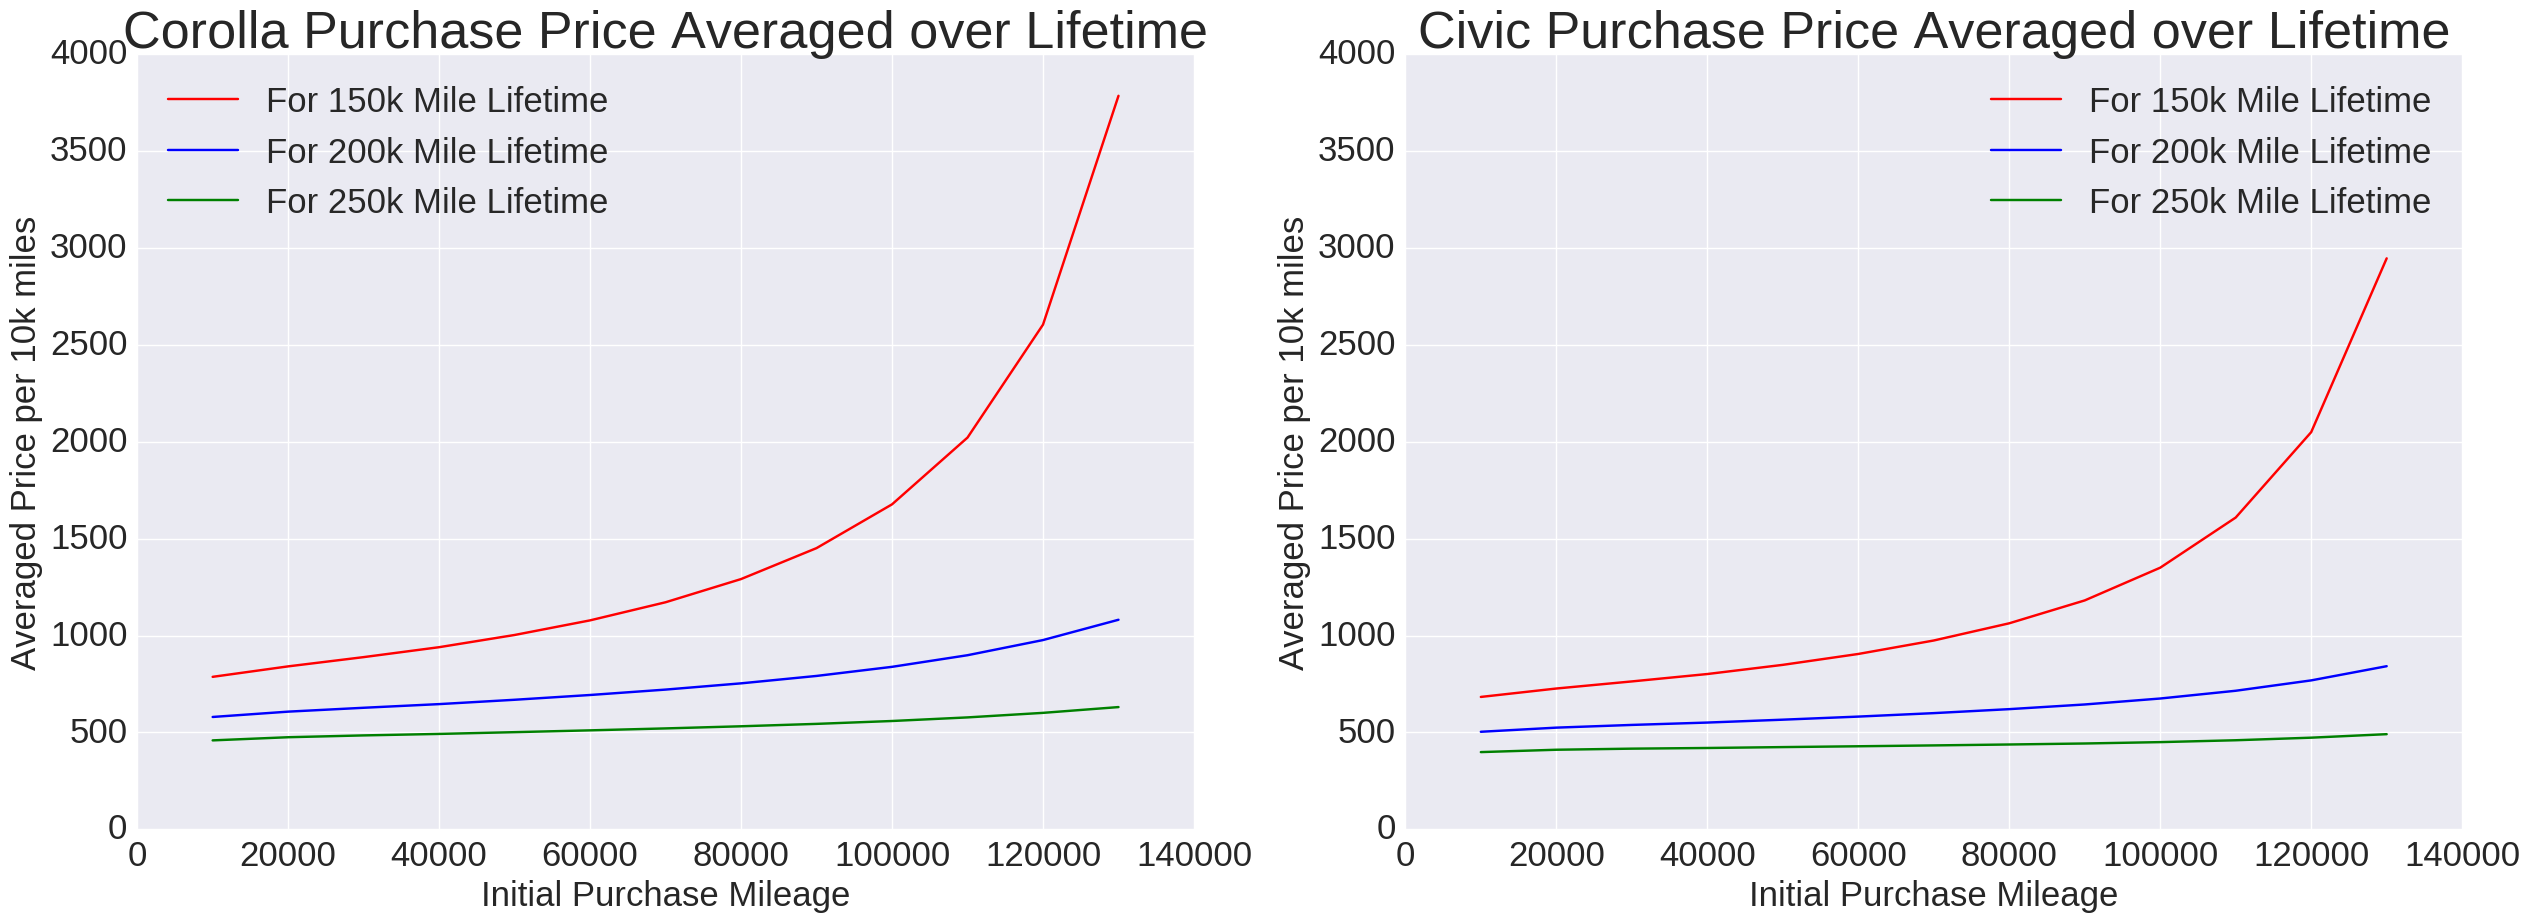

In [88]:
cars = ['corolla', 'civic']
lifetime_mileages = [150000, 200000, 250000]

fig, ax = plt.subplots(1,len(cars))
height = 10
width = 30
fig.set_figheight(height)
fig.set_figwidth(width)
textheight = 25

year = 2011
colors = ['r', 'b', 'g']

for i, car in enumerate(cars):
    dealer = {}
    for j, lifetime_mileage in enumerate(lifetime_mileages):
        ax[i].set_title('%s Purchase Price Averaged over Lifetime' % (car.title()), fontsize=textheight*1.5)
        ax[i].set_xlabel('Initial Purchase Mileage', fontsize=textheight)
        ax[i].set_ylabel('Averaged Price per 10k miles', fontsize=textheight)
        ax[i].tick_params(axis='y', labelsize=textheight)
        ax[i].tick_params(axis='x', labelsize=textheight)
        ax[i].ticklabel_format()

        price_cost_per10k = subset[car][year].dealer/(lifetime_mileage-subset[car][year].mileage)*10000
        maint_cost_per10k = get_avg_maint_cost_per10k(subset[car][year].mileage, lifetime_mileage)
        
        dealer[lifetime_mileage] = ax[i].plot(subset[car][year].mileage, 
                                               price_cost_per10k, 
                                               c=colors[j])


    ax[i].legend([dealer[miles][0] for miles in lifetime_mileages], 
               ['For %dk Mile Lifetime'%(miles/1000) for miles in lifetime_mileages],
              fontsize=textheight,
              loc=0)

    if i == 0:
        y_min = ax[i].get_yticks()[0]
        y_max = ax[i].get_yticks()[-1]
        
    y_incriment = 500
    ax[i].set_yticks(np.arange(y_min, y_max+y_incriment, y_incriment))
        
plt.show()

Of course we want to pay less for our car, which means we want lower "Average Price" values. The trend of green cheaper than blue cheaper than red makes sense: if the car dies on you at 150k miles you going to end up having paid more per mile (worse value) and if it lasts until 250k you will have paid less per mile (better value).

Now, you may have noticed I just got finished explaining that you can only look at one car at a time and then promptly plotted two cars next to each other. I wanted to demonstrate why this comparison is dangerous. You can look closely at the Civic and see that you pay less price per mile than then Corolla (for the same lifetime). You may then be tempted to think the Civic is a better value. The problem with that is in the statement "for the same lifetime". Corollas hold more value at higher mileage BECAUSE they tend to last longer than Civics. So in reality, it may be more accurate to compare the 200k lifetime Civic with the 250k lifetime Corolla. In that case the Corolla has slightly better value. But without detailed information about how the reliability compares, we can't say for sure. Hence we just look at one car at a time so we can ignore those details.

So thinking about just one car at a time then, lets get back to our question - should you buy at higher mileage or lower mileage? From the above plots, we see that **it's universally better to buy lower mileage**. The initial price will be higher, but you get more bang for your buck in the long run if you can spend more up front. How strong this trend is depends on how long the car will last. But even if the car lasts 250k miles, there is a slight trend of worse value with higher purchase mileages (so maybe the purchase mileage doesn't matter AS much if the car is exceptionally reliable). And don't forget, this is only talking about value of the purchase price. We still haven't looked at maintenance cost yet.

The next plot shows a bit more we can learn about the value by comparing model year and purchase method (dealer vs private party) for an example 250k estimate lifetime:

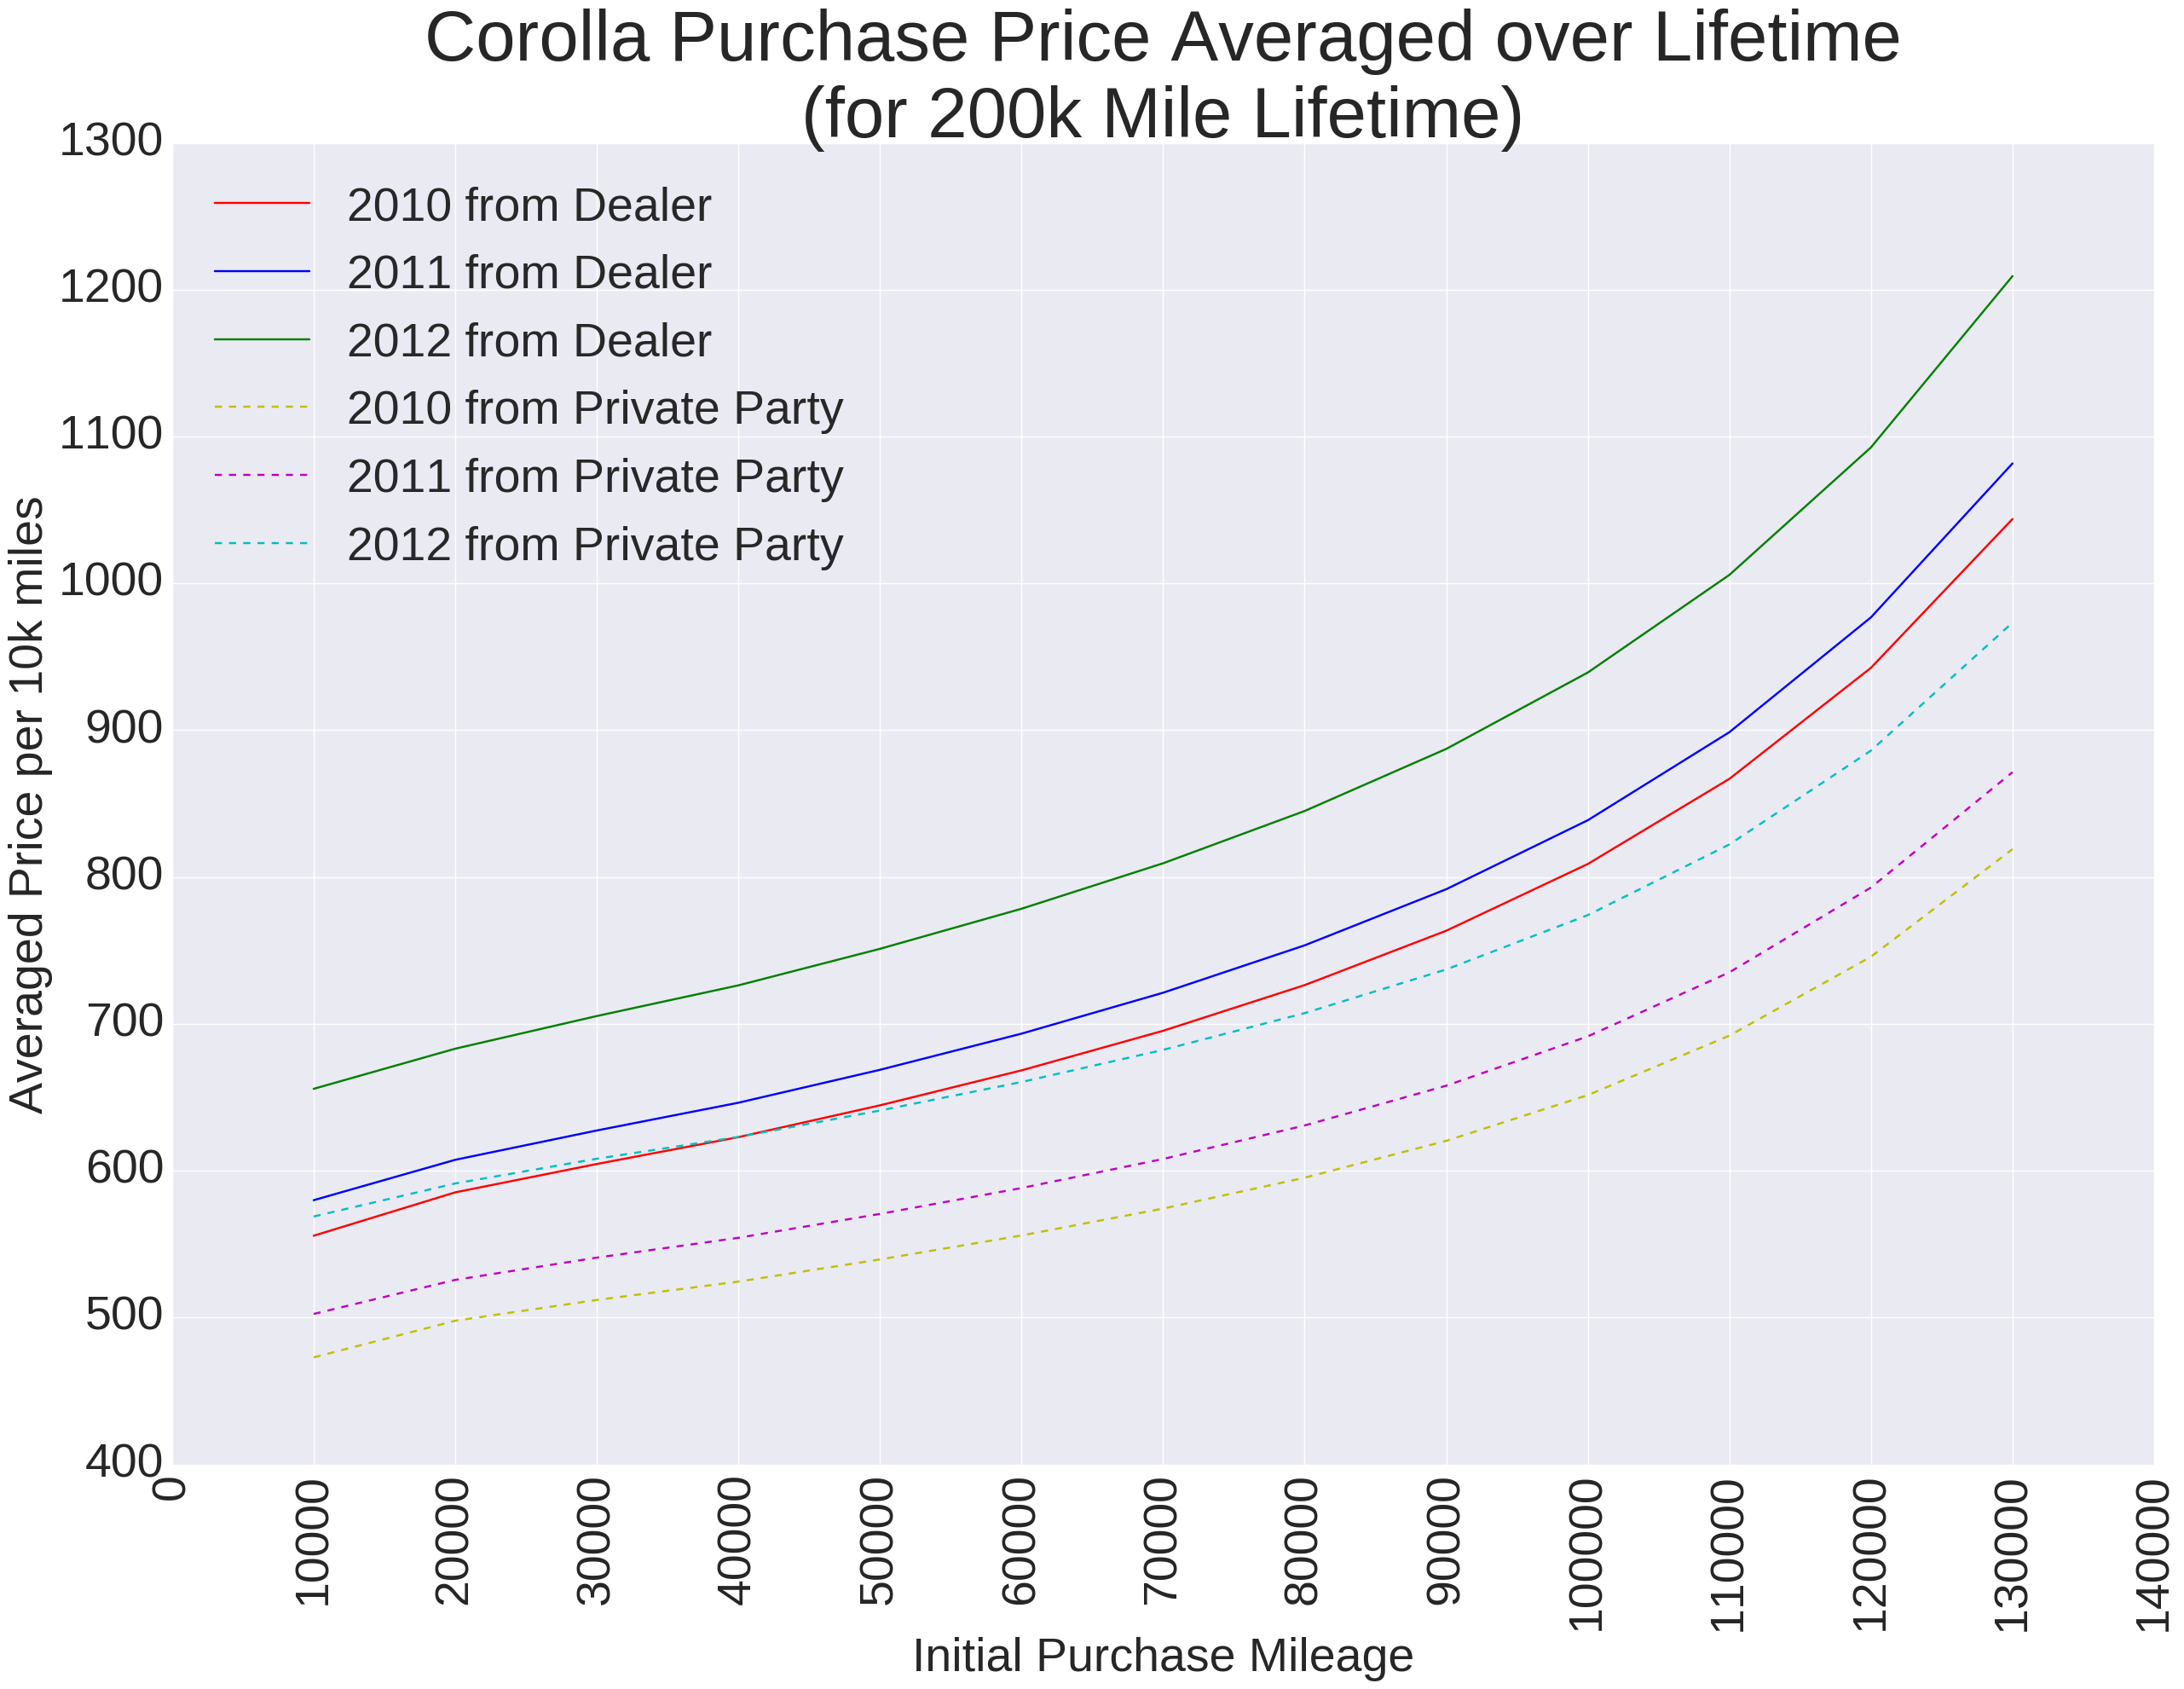

In [98]:
car = 'corolla'
lifetime_mileage = 200000

fig, ax = plt.subplots()
height = 20
width = 30
fig.set_figheight(height)
fig.set_figwidth(width)
textheight = 40


ax.set_title('%s Purchase Price Averaged over Lifetime\n(for %dk Mile Lifetime)' % (car.title(), lifetime_mileage/1000), fontsize=textheight*1.5)
ax.set_xlabel('Initial Purchase Mileage', fontsize=textheight)
ax.set_ylabel('Averaged Price per 10k miles', fontsize=textheight)
ax.tick_params(axis='y', labelsize=textheight)
ax.tick_params(axis='x', labelsize=textheight)
ax.ticklabel_format()

dealer = {}
private = {}
colors = {'dealer':{2010:'r', 2011:'b', 2012:'g'},
          'private':{2010:'y', 2011:'m', 2012:'c'}}

for year in [2010, 2011, 2012]:
    dealer[year] = ax.plot(subset[car][year].mileage, 
                           subset[car][year].dealer/(lifetime_mileage-subset[car][year].mileage)*10000, 
                           c=colors['dealer'][year])
    private[year] = ax.plot(subset[car][year].mileage, 
                            subset[car][year].pp_verygood/(lifetime_mileage-subset[car][year].mileage)*10000,
                            c=colors['private'][year],
                            linestyle='dashed')


ax.legend([dealer[2010][0], 
            dealer[2011][0], 
            dealer[2012][0],
            private[2010][0],
            private[2011][0],
            private[2012][0]], 
           ['2010 from Dealer', 
            '2011 from Dealer', 
            '2012 from Dealer',
            '2010 from Private Party',
            '2011 from Private Party',
            '2012 from Private Party'],
          fontsize=textheight,
          loc=0)

ax.set_yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1]+100, 100))
plt.xticks(np.arange(ax.get_xticks()[0], ax.get_xticks()[-1]+10000, 10000), 
           range(int(ax.get_xticks()[0]), int(ax.get_xticks()[-1])+10000, 10000),
          rotation='vertical')
        
plt.show()

As expected, dealers are more expensive (worse value) than a private party. This is presumably the price you pay for the convenience/service/quality they offer, but you can get better value if you manage to find a comparable car offered privately. And interestingly, the value gets worse faster at dealer prices. **So while you get better value in all cases from a private party, you get *much* better value from a private party for high mileage cars**. 

The second thing to note is that value is better for older model years. Depending on the specific car, it's possible there isn't much difference between model years. Especially if we're only talking about a 1 model year difference on a 5 year old car. **In my book that means an older model year car with the same mileage is a win**. Just watch out for the instances where there is a big redesign or cool new technology introduced between years of interest.

So to summarize for the purchase price: lower initial mileage = better value.

#### Maintenance Costs

By maintenance I mean oil changes and other regular upkeep as well as any repairs that come up. The reason maintenance cost is an important factor here is because older cars cost more to upkeep. Now exact degree to which that is true was tough to get data on. So I made some rough estimates based on the following numbers I dug up:
- Newish cars cost ~\$200 per year to maintain on average
- Very old cars cost ~\$2,000 per year to maintain on average
- The average American drives ~12k miles per year

I'm going to assume that means \$200 per year at year 0, and $2,000 per year at year 20, and that the costs increase linearly between the two. This is probably not exactly right, but it should be good enough to get a sense of how maintenance costs add up compared to the purchase price over time. Also notice this is a general estimate that's not specific to a certain car. In reality maintenance costs vary a lot between cars but I'm assuming the general trend is similar.

With that said, the resulting costs are shown below as a function of the car's initial mileage. The blue dashed line shows what the maintenance costs are at each mileage. The green & red lines show the average maintenance costs when you add it up over the whole expected lifetime of the car (shown for 250k & 150k lifetimes respectively).


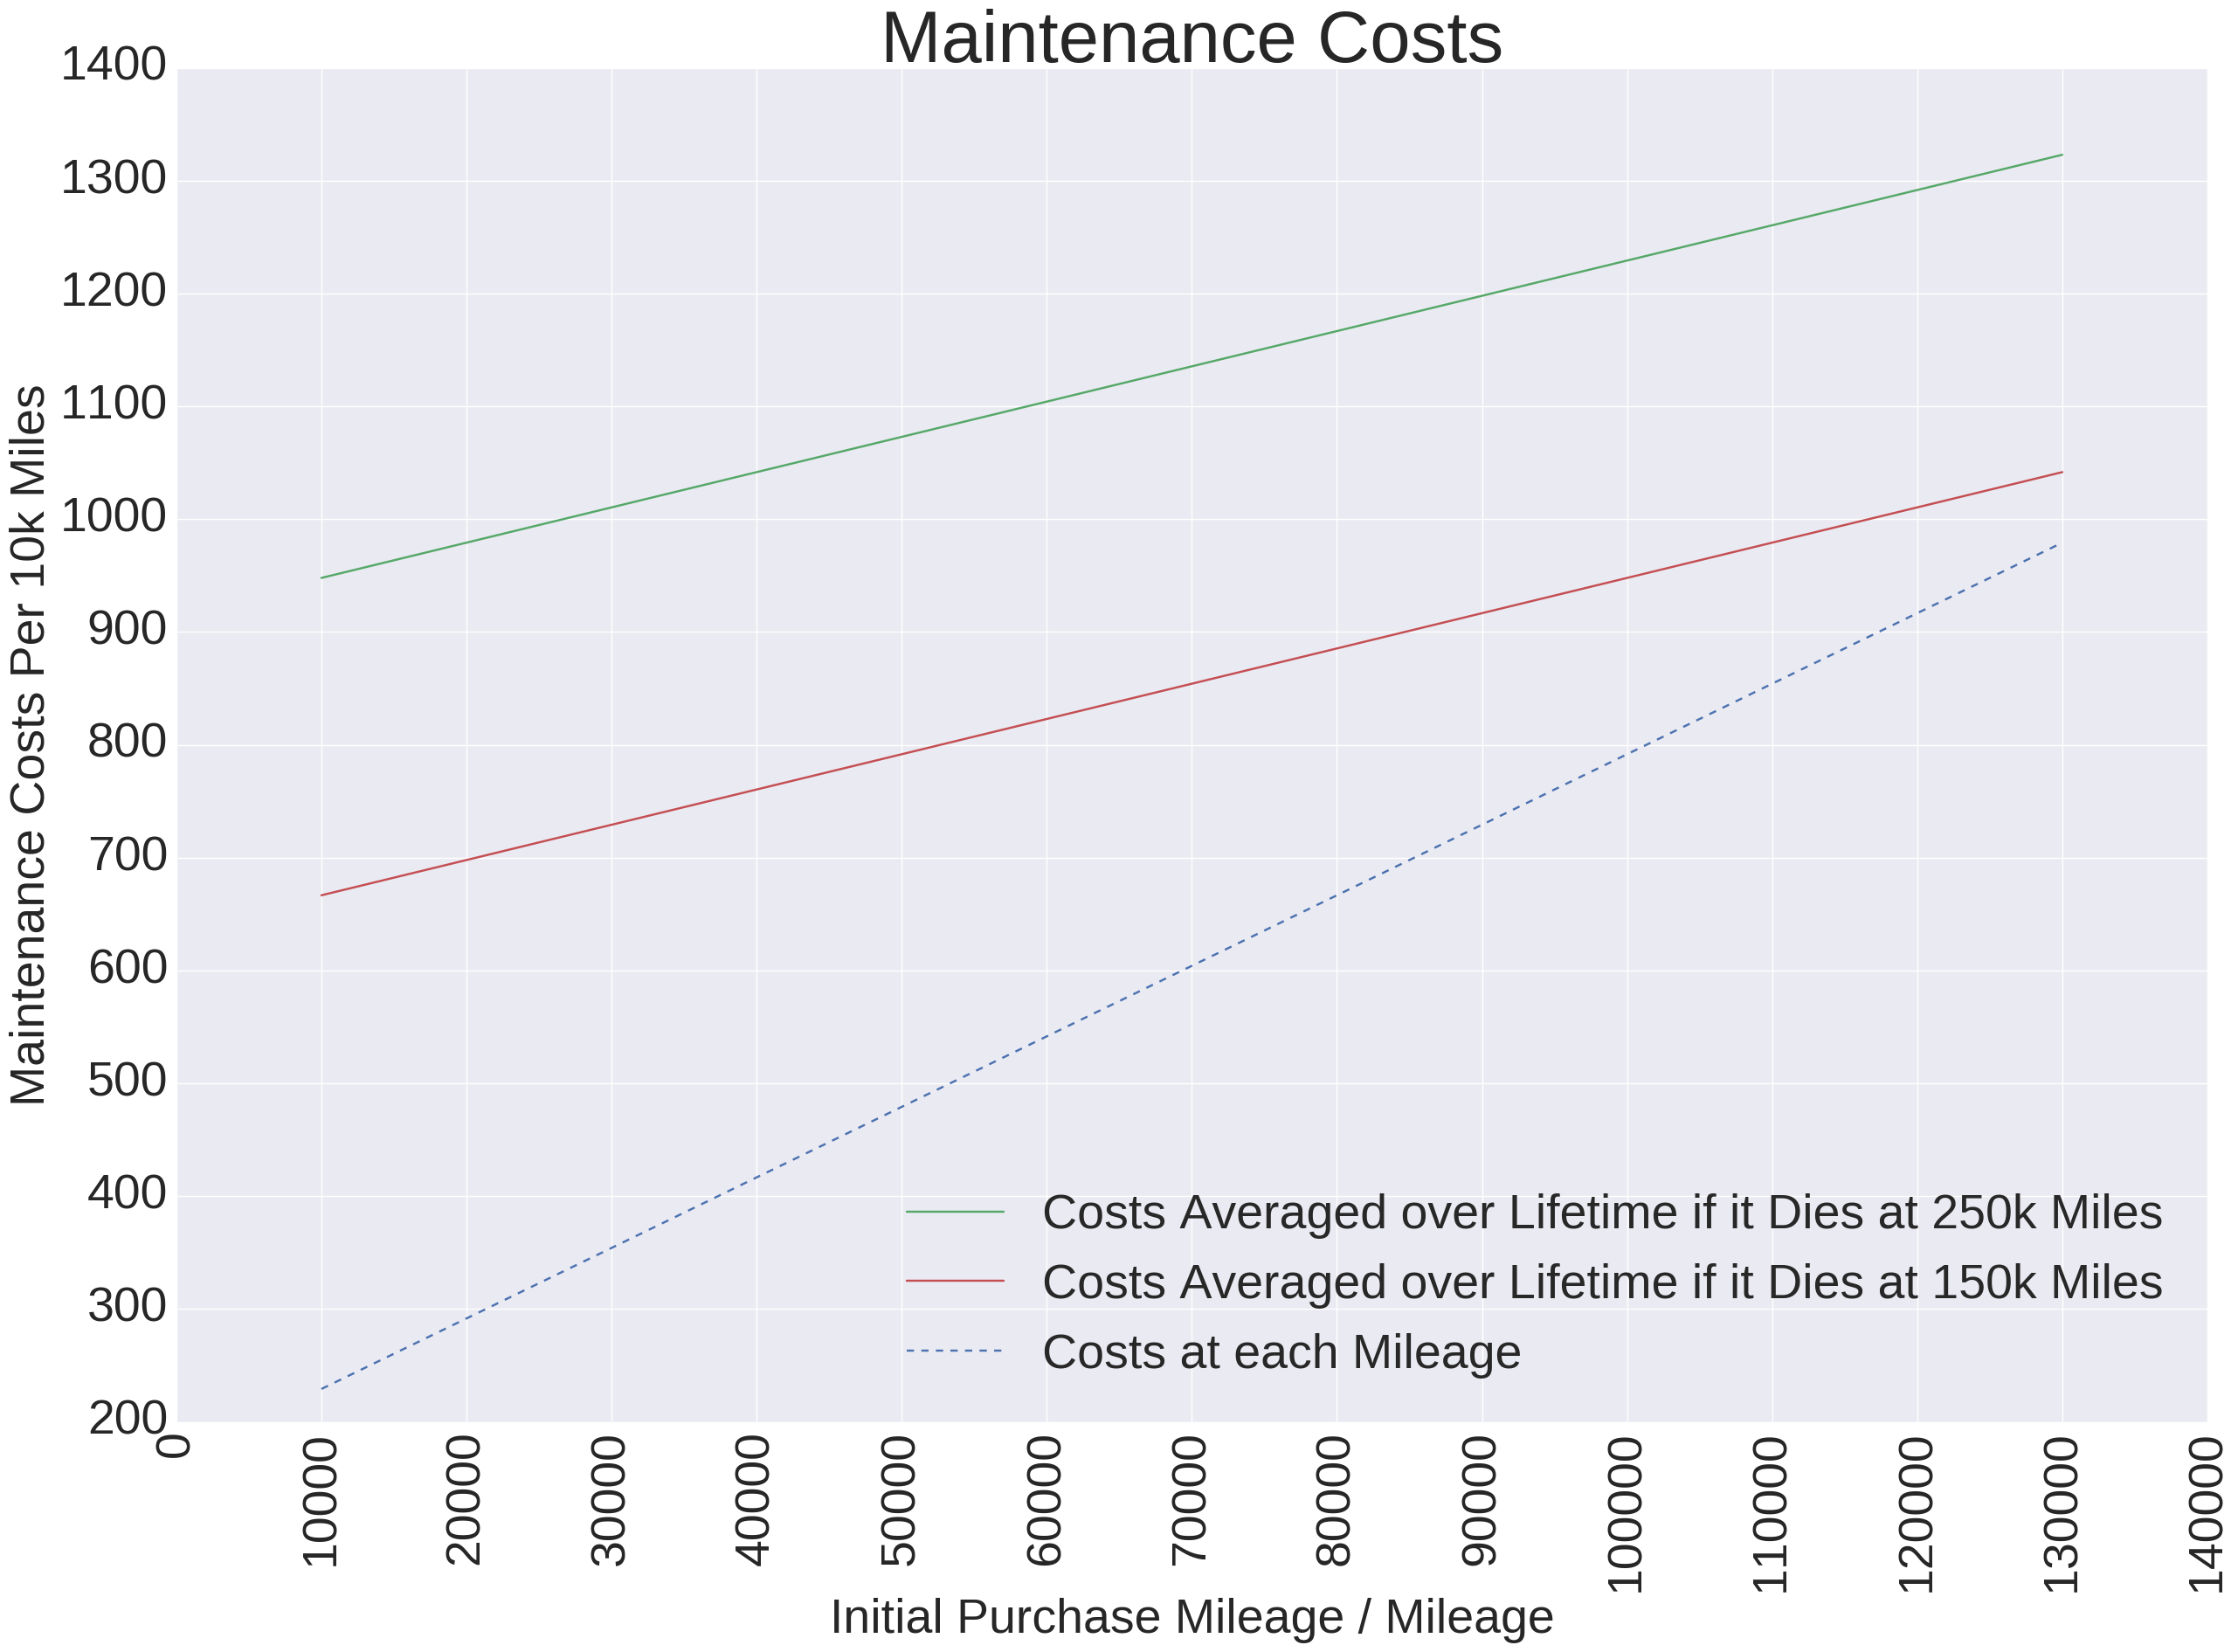

In [94]:
avg_miles_per_year = 12000.

maint_per_year_year0 = 200.
maint_per_year_year20 = 2000.

maint_per_mile_year0 = maint_per_year_year0 / avg_miles_per_year
maint_per_mile_year20 = maint_per_year_year20 / avg_miles_per_year

maintpermile_vs_miles_m = (maint_per_mile_year20 - maint_per_mile_year0) / (20.*avg_miles_per_year - 0.)
maintpermile_vs_miles_b = maint_per_mile_year0

def get_avg_maint_cost_per10k(start_mileage, end_mileage):
    if end_mileage > 240000:
        end_mileage = 240000
    
    avg_maint_cpm = maintpermile_vs_miles_b + \
                    maintpermile_vs_miles_m*(start_mileage+end_mileage)/2.
    
    return 10000*avg_maint_cpm

fig, ax = plt.subplots()
height = 20
width = 30
fig.set_figheight(height)
fig.set_figwidth(width)
textheight = 40

ax.set_title('Maintenance Costs', fontsize=textheight*1.5)
ax.set_xlabel('Initial Purchase Mileage / Mileage', fontsize=textheight)
ax.set_ylabel('Maintenance Costs Per 10k Miles', fontsize=textheight)
ax.tick_params(axis='y', labelsize=textheight)
ax.tick_params(axis='x', labelsize=textheight)
ax.ticklabel_format()

total_maint_cost_per10k = []
total_maint_cost_per10k2 = []
maint_cost_per10k = []
for miles in subset[car][year].iterrows():
    total_maint_cost_per10k.append(get_avg_maint_cost_per10k(miles[1].mileage, 250000))
    total_maint_cost_per10k2.append(get_avg_maint_cost_per10k(miles[1].mileage, 150000))
    maint_cost_per10k.append(10000*(miles[1].mileage*maintpermile_vs_miles_m + maintpermile_vs_miles_b))

maint = ax.plot(subset[car][year].mileage, maint_cost_per10k, linestyle='dashed')
total = ax.plot(subset[car][year].mileage, total_maint_cost_per10k)
total2 = ax.plot(subset[car][year].mileage, total_maint_cost_per10k2)

ax.legend([total[0], 
           total2[0],
            maint[0]], 
            ['Costs Averaged over Lifetime if it Dies at %dk Miles'%(250), 
             'Costs Averaged over Lifetime if it Dies at %dk Miles'%(150), 
            'Costs at each Mileage'],
            fontsize=textheight,
            loc=0)

ax.set_yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1]+100, 100))
plt.xticks(np.arange(ax.get_xticks()[0], ax.get_xticks()[-1]+10000, 10000), 
           range(int(ax.get_xticks()[0]), int(ax.get_xticks()[-1])+10000, 10000),
          rotation='vertical')
        
plt.show()

It may have been easy to guess given that maintenance is cheaper at lower mileages, but the averaged maintenance costs have the same trend as purchase price - **a lower initial mileage gives a better long term maintenance value**. 

We can also compare the maintenance costs to the purchase price. Comparing the earlier plots you can see that **the averaged maintenance costs are as large or larger than the averaged purchase price**. 

#### Combined Value vs Mileage

To wrap things up, one last plot showing combined maintenance and purchace price costs again for the corolla as an example. **The moral of the story is the same: The lower mileage car you can afford, the more value you'll get**. This trend holds between all the car models, though it's slightly more/less dramatic in different cases.

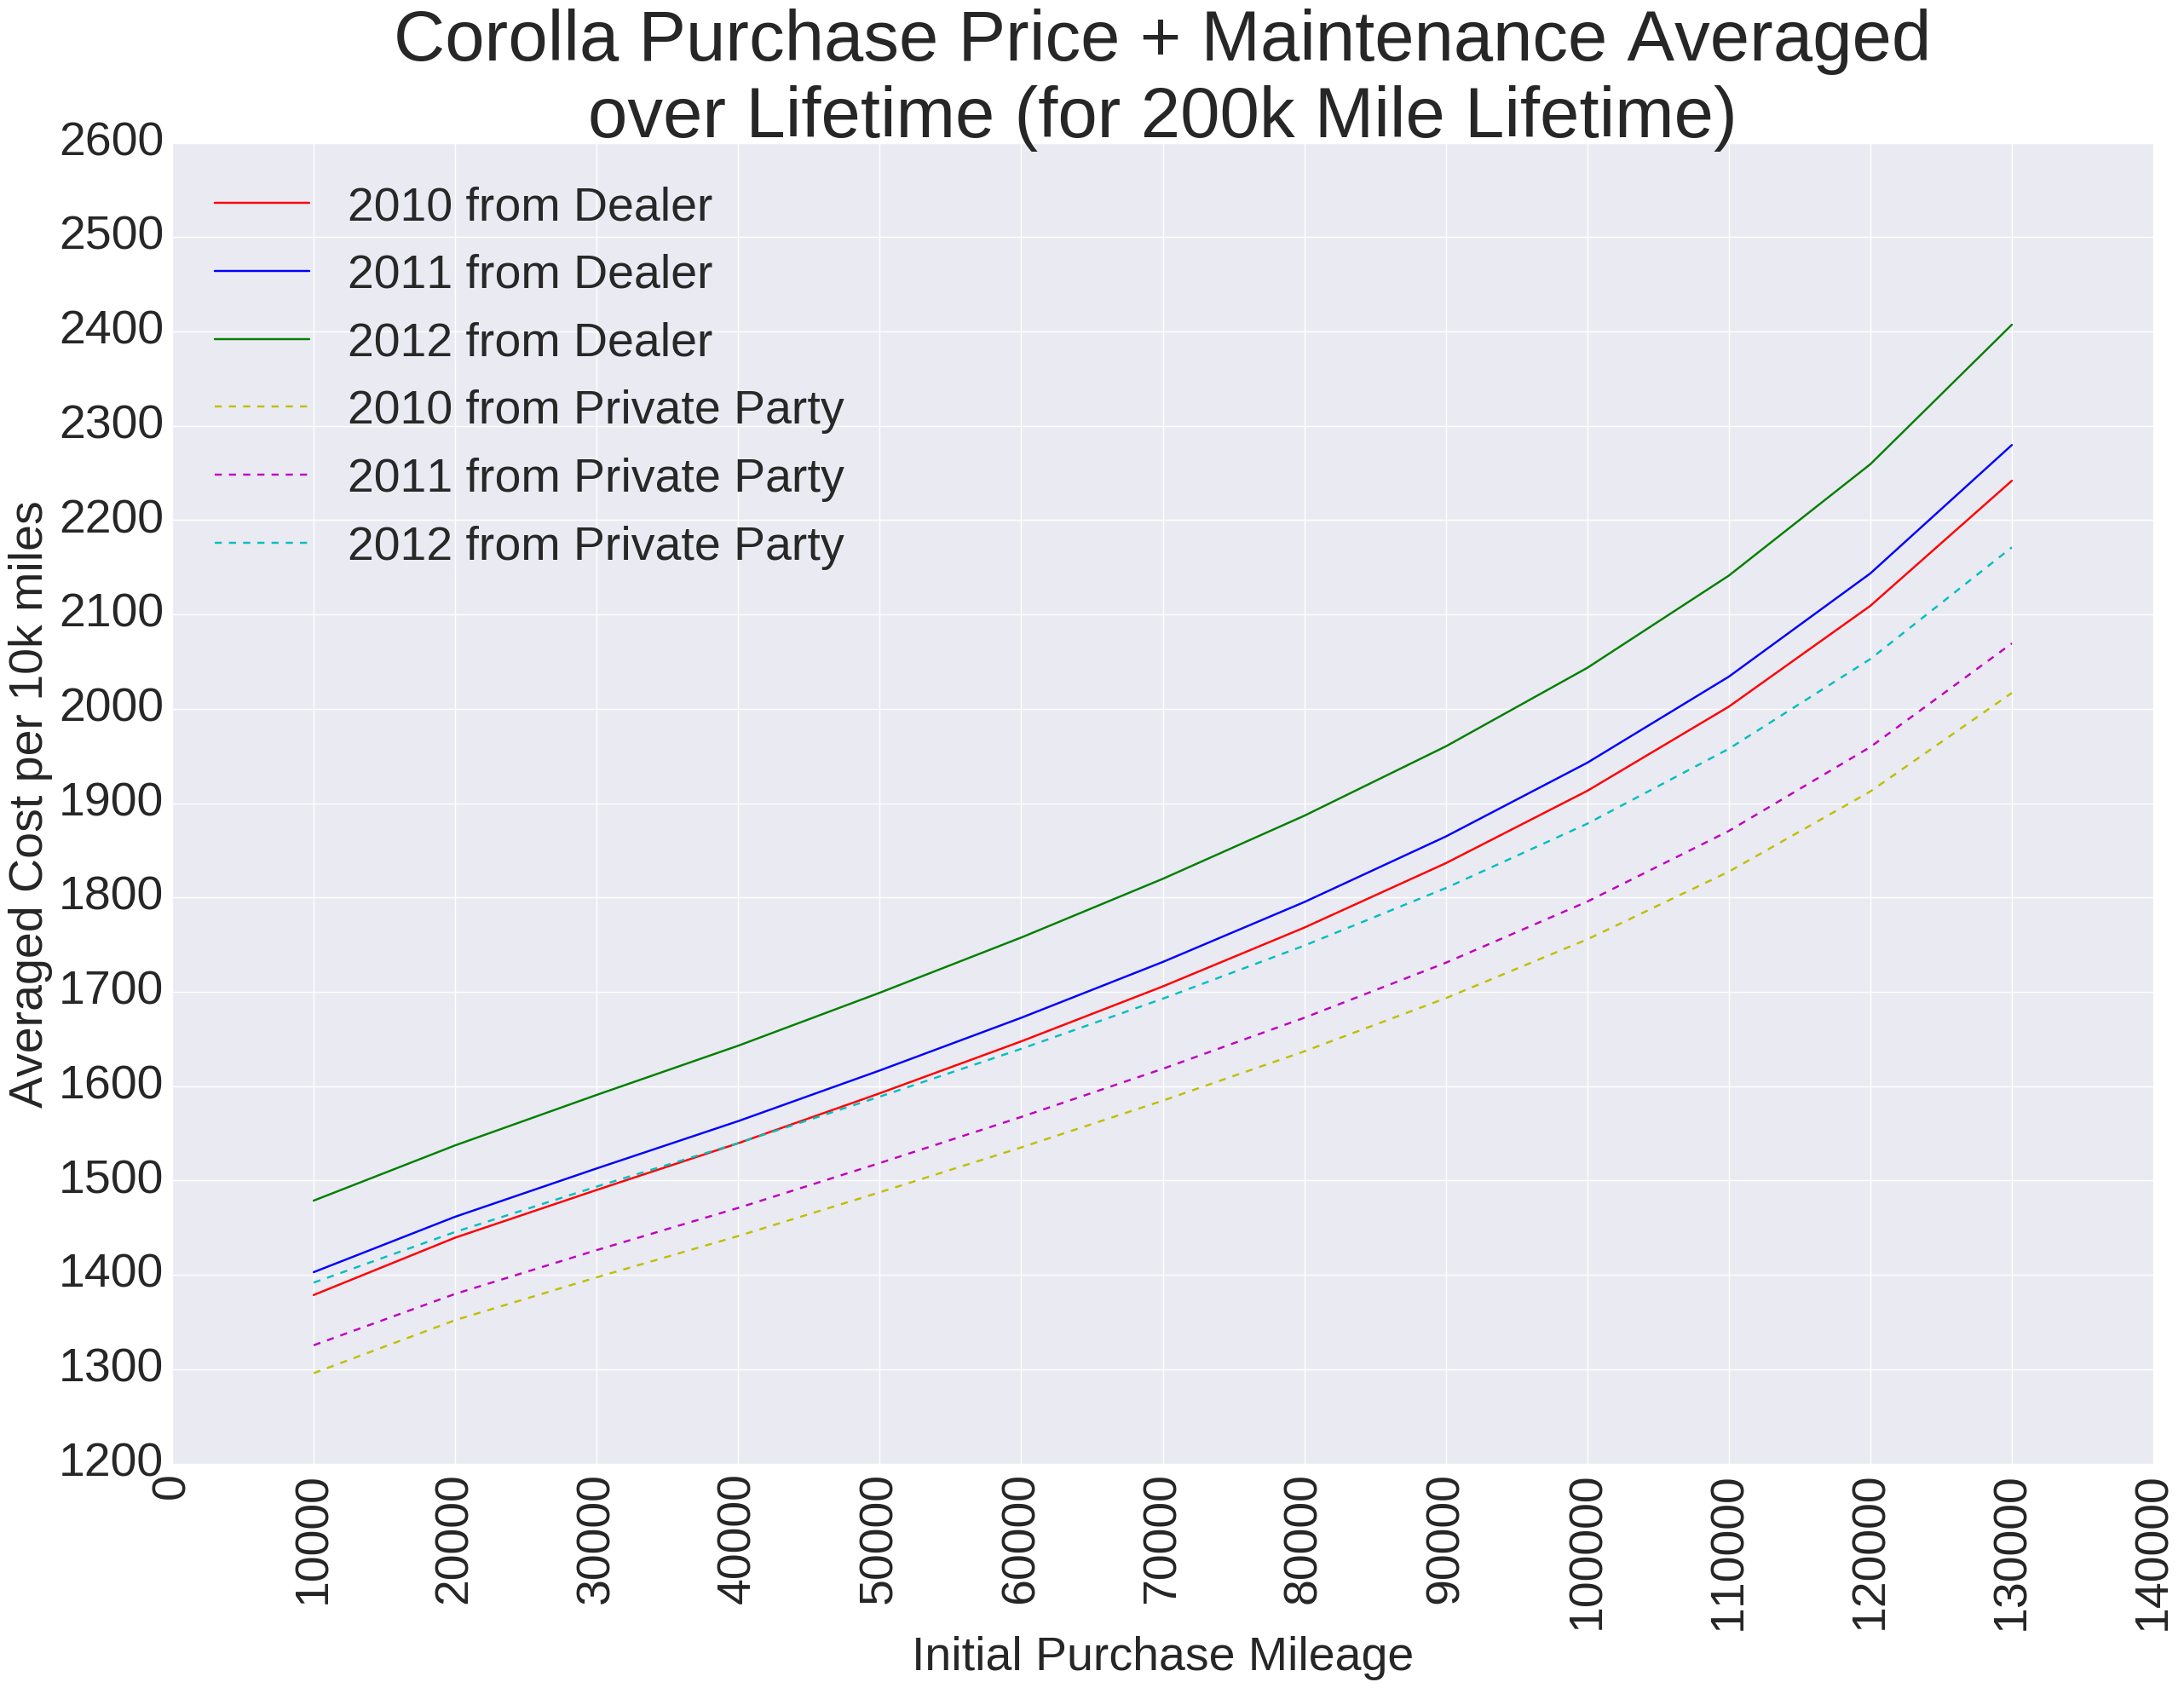

In [127]:
car = 'corolla'
lifetime_mileage = 200000

fig, ax = plt.subplots()
height = 20
width = 30
fig.set_figheight(height)
fig.set_figwidth(width)
textheight = 40


ax.set_title('%s Purchase Price + Maintenance Averaged\nover Lifetime (for %dk Mile Lifetime)' % (car.title(), lifetime_mileage/1000), fontsize=textheight*1.5)
ax.set_xlabel('Initial Purchase Mileage', fontsize=textheight)
ax.set_ylabel('Averaged Cost per 10k miles', fontsize=textheight)
ax.tick_params(axis='y', labelsize=textheight)
ax.tick_params(axis='x', labelsize=textheight)
ax.ticklabel_format()

dealer = {}
private = {}
colors = {'dealer':{2010:'r', 2011:'b', 2012:'g'},
          'private':{2010:'y', 2011:'m', 2012:'c'}}

for year in [2010, 2011, 2012]:
    maint_cost_per10k = get_avg_maint_cost_per10k(subset[car][year].mileage, lifetime_mileage)

    price_cost_per10k = subset[car][year].dealer/(lifetime_mileage-subset[car][year].mileage)*10000
    dealer[year] = ax.plot(subset[car][year].mileage, 
                           price_cost_per10k+maint_cost_per10k, 
                           c=colors['dealer'][year])
    
    price_cost_per10k = subset[car][year].pp_verygood/(lifetime_mileage-subset[car][year].mileage)*10000
    private[year] = ax.plot(subset[car][year].mileage, 
                            price_cost_per10k+maint_cost_per10k,
                            c=colors['private'][year],
                            linestyle='dashed')


ax.legend([dealer[2010][0], 
            dealer[2011][0], 
            dealer[2012][0],
            private[2010][0],
            private[2011][0],
            private[2012][0]], 
           ['2010 from Dealer', 
            '2011 from Dealer', 
            '2012 from Dealer',
            '2010 from Private Party',
            '2011 from Private Party',
            '2012 from Private Party'],
          fontsize=textheight,
          loc=0)

ax.set_yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1]+100, 100))
plt.xticks(np.arange(ax.get_xticks()[0], ax.get_xticks()[-1]+10000, 10000), 
           range(int(ax.get_xticks()[0]), int(ax.get_xticks()[-1])+10000, 10000),
          rotation='vertical')
       
plt.savefig('corolla_value', bbox_inches='tight') 
plt.show()

<a id='hybrids'></a>

### 4. How does a hybrid compare in long term value compared to a standard sedan?

[**top of page**](#top)

The last thing to figure out is whether or not a hybrid is worth the extra price over a standard sedan. Since we have already calculated averaged costs for purchase price and maintenance, it will be relatively straightforward to add in gas costs.

The only caveat is, as previously discussed, that the averaged costs were calculated with simplifying assumptions that mean you can't compare different models directly. But we're going to do it anyway. We can minimize any unaccounted-for differences between models by comparing sedan vs hybrid models of the same make. The theory there being that the company will use at least *similar* quality/reliability standards between the selected models. Our list contains two such pairs to compare: the Toyota Corolla/Prius and the Honda Civic/Insight. So this will give us a result comparing hybrid vs non-hybrid value, but it should be taken with a grain of salt.

Before adding the fuel costs, lets take a look at the purchase price and maintenance costs between these models. Again, the most attention should be given to the Toyota vs Toyota and Honda vs Honda comparisons, not Toyota vs Honda comparisons. The sedans are solid lines and the hybrids use dashed lines.

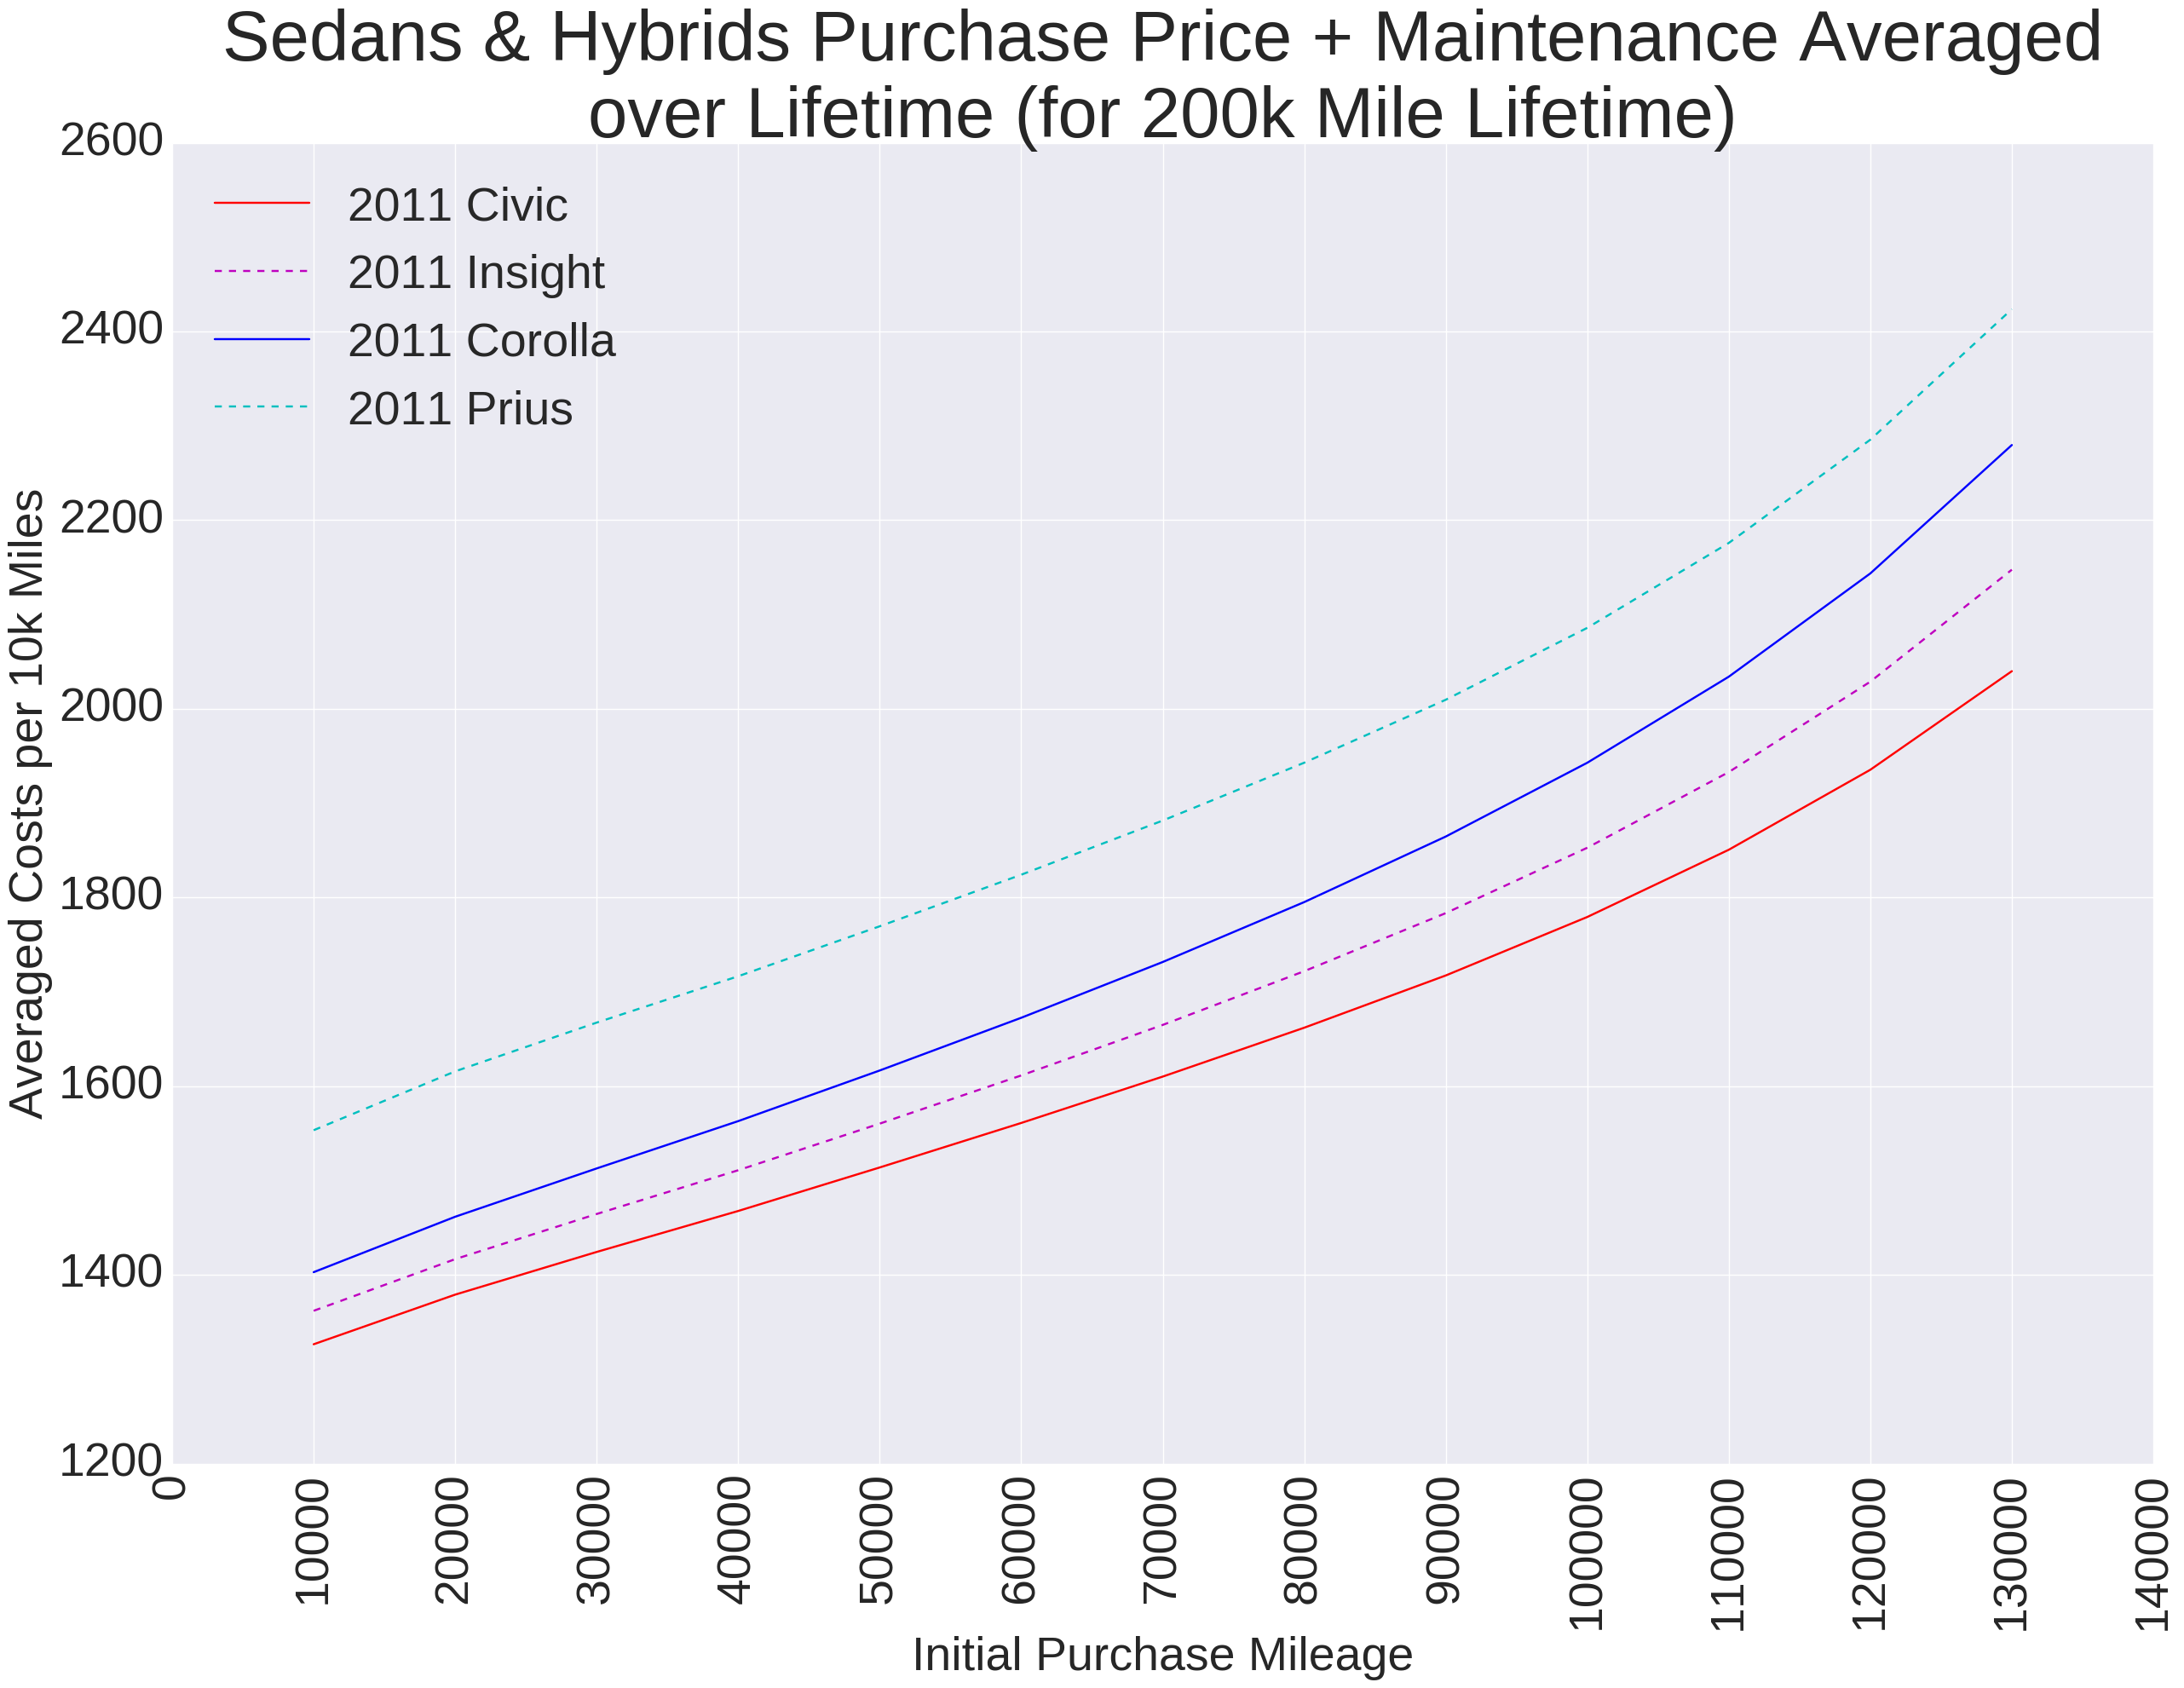

In [122]:
avg_miles_per_year = 12000.

maint_per_year_year0 = 200.
maint_per_year_year20 = 2000.

maint_per_mile_year0 = maint_per_year_year0 / avg_miles_per_year
maint_per_mile_year20 = maint_per_year_year20 / avg_miles_per_year

maintpermile_vs_miles_m = (maint_per_mile_year20 - maint_per_mile_year0) / (20.*avg_miles_per_year - 0.)
maintpermile_vs_miles_b = maint_per_mile_year0

def get_avg_maint_cost_per10k(start_mileage, end_mileage):
    avg_maint_cpm = maintpermile_vs_miles_b + \
                    maintpermile_vs_miles_m*(start_mileage+end_mileage)/2.
    
    return 10000*avg_maint_cpm

cars = ['civic', 'insight', 'corolla', 'prius']
lifetime_mileage = 200000

fig, ax = plt.subplots()
height = 20
width = 30
fig.set_figheight(height)
fig.set_figwidth(width)
textheight = 40


ax.set_title('Sedans & Hybrids Purchase Price + Maintenance Averaged\n\
over Lifetime (for %dk Mile Lifetime)' % (lifetime_mileage/1000), 
             fontsize=textheight*1.5)
ax.set_xlabel('Initial Purchase Mileage', fontsize=textheight)
ax.set_ylabel('Averaged Costs per 10k Miles', fontsize=textheight)
ax.tick_params(axis='y', labelsize=textheight)
ax.tick_params(axis='x', labelsize=textheight)
ax.ticklabel_format()

purchase_cost_per10k = {}
gas_cost_per10k = {}
maint_cost_per10k = {}

colors = {'civic':'r', 'insight':'m', 'corolla':'b', 'prius':'c'}
style = {'civic':'solid', 'insight':'dashed', 'corolla':'solid', 'prius':'dashed'}
line = {}

for car in cars:
    line[car] = {}
    for year in [2011,]:
        cost_per_miles = []
        
        for row in subset[car][year].iterrows():
            purchase_cost_per10k = row[1].dealer/(lifetime_mileage-row[1].mileage)*10000
            maint_cost_per_10k = get_avg_maint_cost_per10k(row[1]['mileage'], lifetime_mileage)
            
            cost_per_miles.append(purchase_cost_per10k + maint_cost_per_10k)
        
        line[car][year] = ax.plot(subset[car][year].mileage, 
                                   cost_per_miles, 
                                   c=colors[car],
                                 linestyle=style[car])

ax.legend([line[car][2011][0] for car in cars], 
           ['2011 %s' % (car.title()) for car in cars],
          fontsize=textheight,
          loc=0)

ax.set_yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1]+200, 200))
plt.xticks(np.arange(ax.get_xticks()[0], ax.get_xticks()[-1]+10000, 10000), 
           range(int(ax.get_xticks()[0]), int(ax.get_xticks()[-1])+10000, 10000),
          rotation='vertical')
        
plt.show()

As expected, the hybrids have worse value due to a higher purchase price before accounting for fuel efficiency. The average miles per gallon for each model is listed on Kelley Blue Book. Averaged costs are already given "per 10k miles", so with mpg and an average cost of gas, it's simple arithmetic to calculate fuel costs "per 10k miles". The result will be a constant factor with respect to mileage added to the costs (technically fuel efficiency degrades in a vehicle slightly over time, but this effect should be negligible compared to other assumptions we've made). 

In New York, gas is around \$2.25 per gallon right now. And average gas mileage for each vehicle is listed in the final plot below.

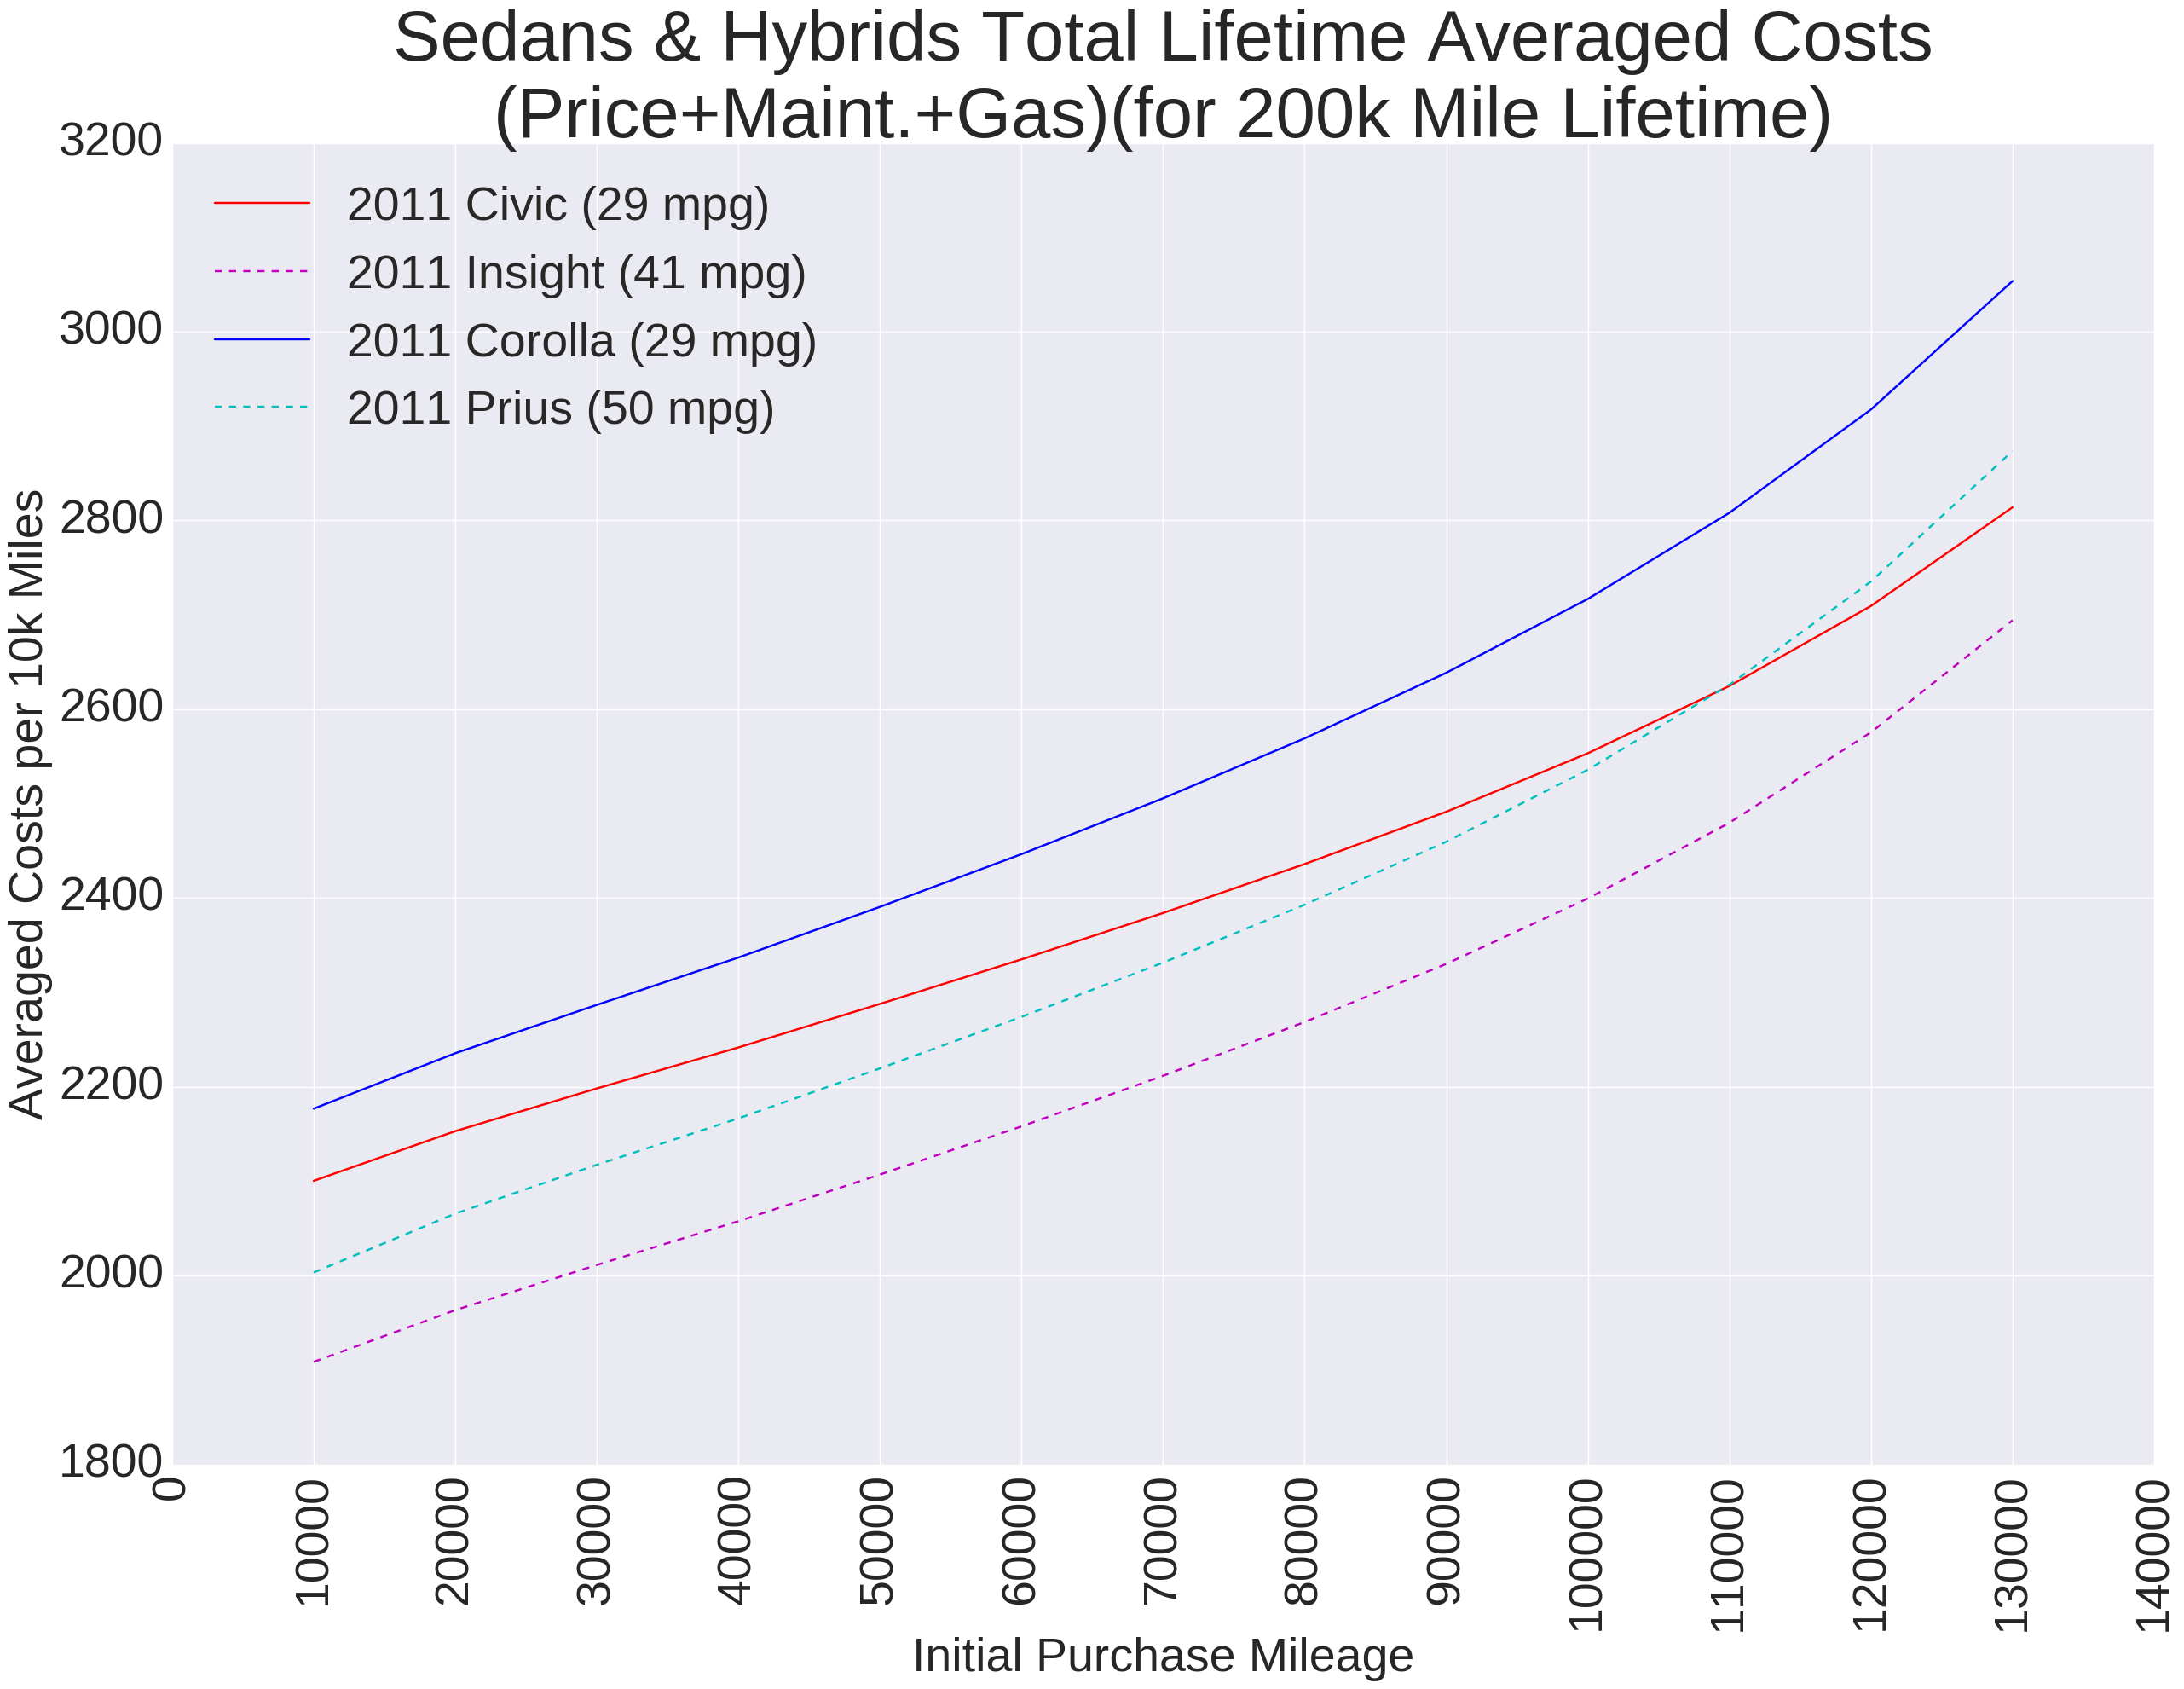

In [123]:
avg_miles_per_year = 12000.

maint_per_year_year0 = 200.
maint_per_year_year20 = 2000.

maint_per_mile_year0 = maint_per_year_year0 / avg_miles_per_year
maint_per_mile_year20 = maint_per_year_year20 / avg_miles_per_year

maintpermile_vs_miles_m = (maint_per_mile_year20 - maint_per_mile_year0) / (20.*avg_miles_per_year - 0.)
maintpermile_vs_miles_b = maint_per_mile_year0

def get_avg_maint_cost_per10k(start_mileage, end_mileage):
    avg_maint_cpm = maintpermile_vs_miles_b + \
                    maintpermile_vs_miles_m*(start_mileage+end_mileage)/2.
    
    return 10000*avg_maint_cpm

# looked up average mpg values for each on kbb manually
mpg = {
    'civic': 29,
    'insight': 41,
    'corolla': 29,
    'prius': 50
}
gas_price = 2.25

cars = ['civic', 'insight', 'corolla', 'prius']
lifetime_mileage = 200000

fig, ax = plt.subplots()
height = 20
width = 30
fig.set_figheight(height)
fig.set_figwidth(width)
textheight = 40


ax.set_title('Sedans & Hybrids Total Lifetime Averaged Costs\n\
(Price+Maint.+Gas)(for %dk Mile Lifetime)' % (lifetime_mileage/1000), 
             fontsize=textheight*1.5)
ax.set_xlabel('Initial Purchase Mileage', fontsize=textheight)
ax.set_ylabel('Averaged Costs per 10k Miles', fontsize=textheight)
ax.tick_params(axis='y', labelsize=textheight)
ax.tick_params(axis='x', labelsize=textheight)
ax.ticklabel_format()

purchase_cost_per10k = {}
gas_cost_per10k = {}
maint_cost_per10k = {}

colors = {'civic':'r', 'insight':'m', 'corolla':'b', 'prius':'c'}
style = {'civic':'solid', 'insight':'dashed', 'corolla':'solid', 'prius':'dashed'}
line = {}

for car in cars:
    line[car] = {}
    for year in [2011,]:
        cost_per_miles = []
        
        for row in subset[car][year].iterrows():
            purchase_cost_per10k = row[1].dealer/(lifetime_mileage-row[1].mileage)*10000
            gas_cost_per_10k = 10000/mpg[car]*gas_price
            maint_cost_per_10k = get_avg_maint_cost_per10k(row[1]['mileage'], lifetime_mileage)
            
            cost_per_miles.append(purchase_cost_per10k + gas_cost_per_10k + maint_cost_per_10k)
        
        line[car][year] = ax.plot(subset[car][year].mileage, 
                                   cost_per_miles, 
                                   c=colors[car],
                                 linestyle=style[car])

ax.legend([line[car][2011][0] for car in cars], 
           ['2011 %s (%d mpg)' % (car.title(), mpg[car]) for car in cars],
          fontsize=textheight,
          loc=0)

ax.set_yticks(np.arange(ax.get_yticks()[0], ax.get_yticks()[-1]+200, 200))
plt.xticks(np.arange(ax.get_xticks()[0], ax.get_xticks()[-1]+10000, 10000), 
           range(int(ax.get_xticks()[0]), int(ax.get_xticks()[-1])+10000, 10000),
          rotation='vertical')
        
plt.show()

With grain of salt in hand, the result shows the **hybrids do have a better value. They have 5-10% cheaper total costs**.

<a id='summary'></a>

### Summary

[**top of page**](#top)

Kelley blue book data has given us some good insight to better understand the used car market:

1. [**How do used car prices trend with mileage and model year?**](#price)
   - Between 30k-100k miles, price trends pretty linearly vs mileage. price changes more slowly vs mileage at lower and higher ranges.
   - Different model years have slightly higher/lower prices but the trend vs mileage is the same between years
   
2. [**How do these trends differ between similar car models?**](#models)
   - The selected models are more/less expensive and hold their values differently with mileage. See plot:
   <img src="models_comparison.png">
   
3. [**What mileage of car gives the best value?**](#value)
   - For a given car model, both purchase price and maintenance costs averaged over the car's lifetime are cheaper if you buy a lower mileage car. Here is an example of Toyota Corolla purchase+maintenance costs for different purchase conditions:
   <img src="corolla_value.png">
   
4. [**How does a hybrid compare in long term value compared to a standard sedan?**](#hybrids)
   - A rough analysis suggests that with fuel costs accounted for, hybrids have ~5-10% cheaper costs averaged over car lifetime.
   
While we learned a lot, there is still more to consider if we want a more concrete value comparison between car models. These results have some simplifying assumptions. Stay tuned for a follow up post where we'll take a closer look!
